<a href="https://colab.research.google.com/github/mhtasnia/ML_practice/blob/main/MLPractice_magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.


In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAysm", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAysm  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAysm  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

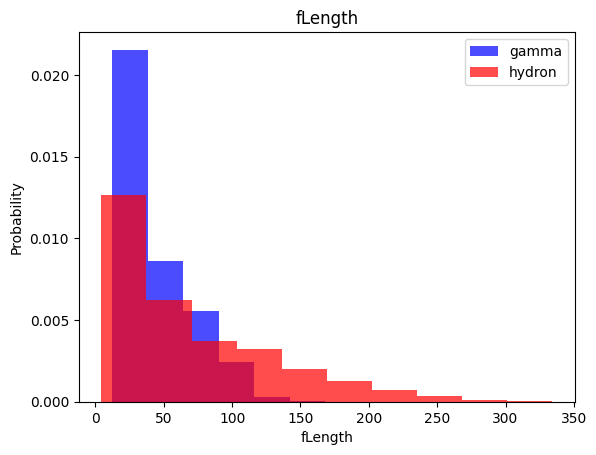

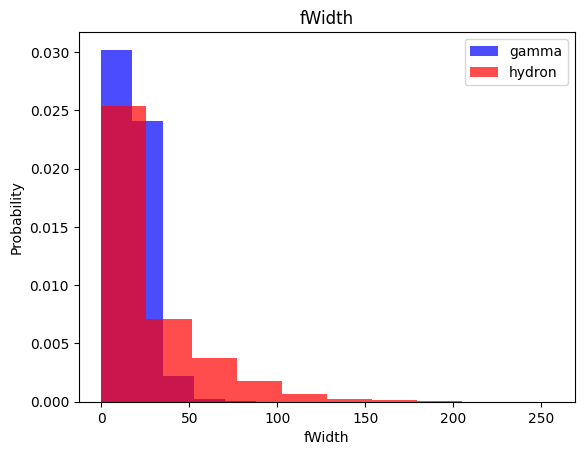

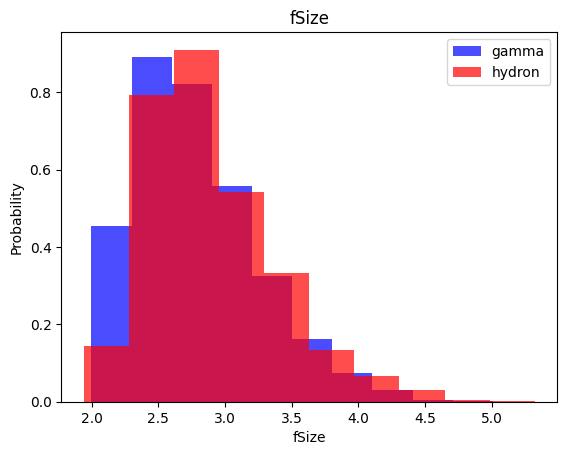

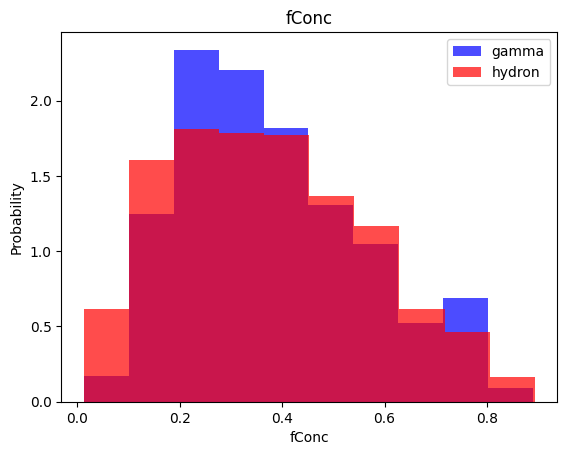

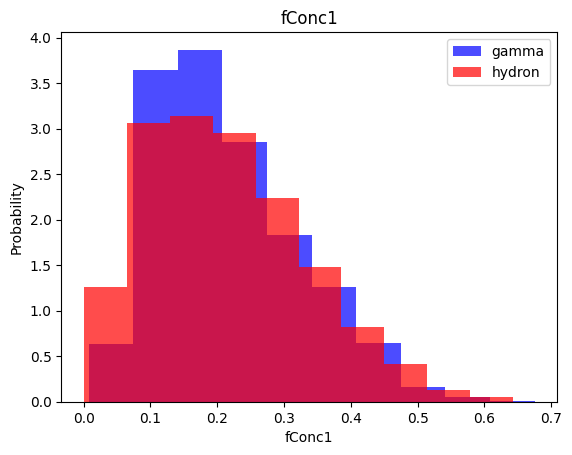

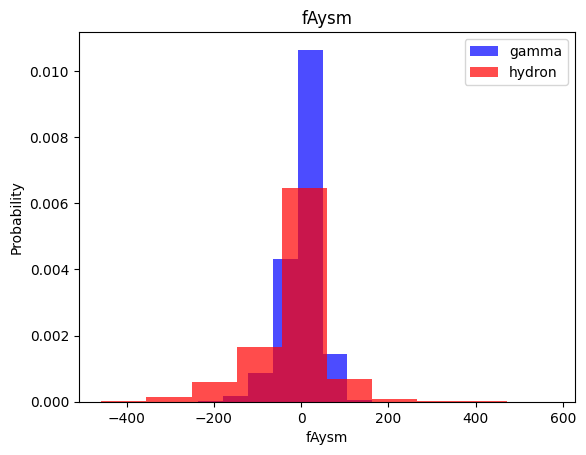

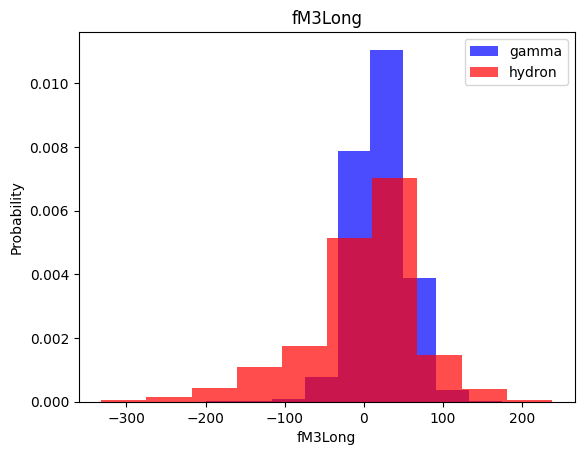

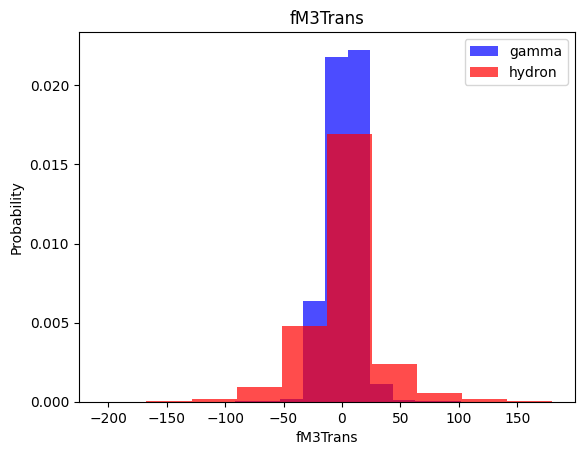

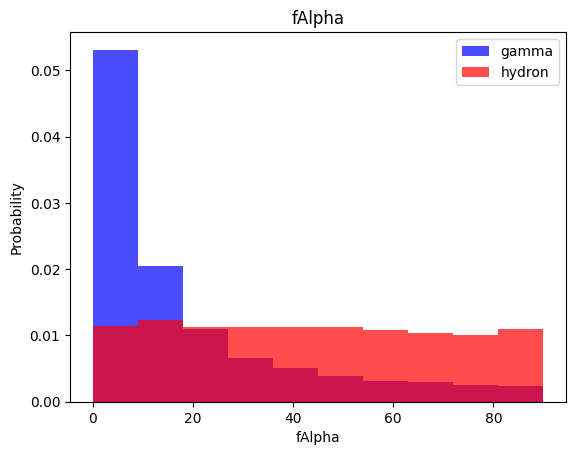

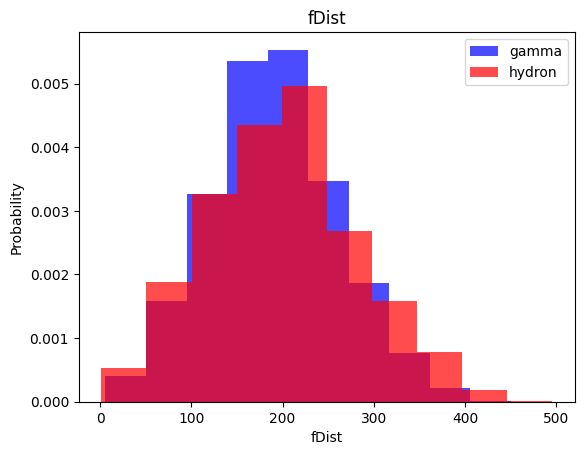

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hydron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Valid and Test Dataset

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
print(len(y_train))
print(len(y_valid))
print(len(y_test))

19646
1902
1902


kNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_valid)

In [ ]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       683
           1       0.84      0.85      0.84      1219

    accuracy                           0.80      1902
   macro avg       0.78      0.78      0.78      1902
weighted avg       0.80      0.80      0.80      1902



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50       674
           1       0.73      0.90      0.81      1228

    accuracy                           0.72      1902
   macro avg       0.71      0.65      0.65      1902
weighted avg       0.71      0.72      0.70      1902



Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       674
           1       0.84      0.83      0.84      1228

    accuracy                           0.79      1902
   macro avg       0.77      0.77      0.77      1902
weighted avg       0.79      0.79      0.79      1902



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

Neural Node


In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

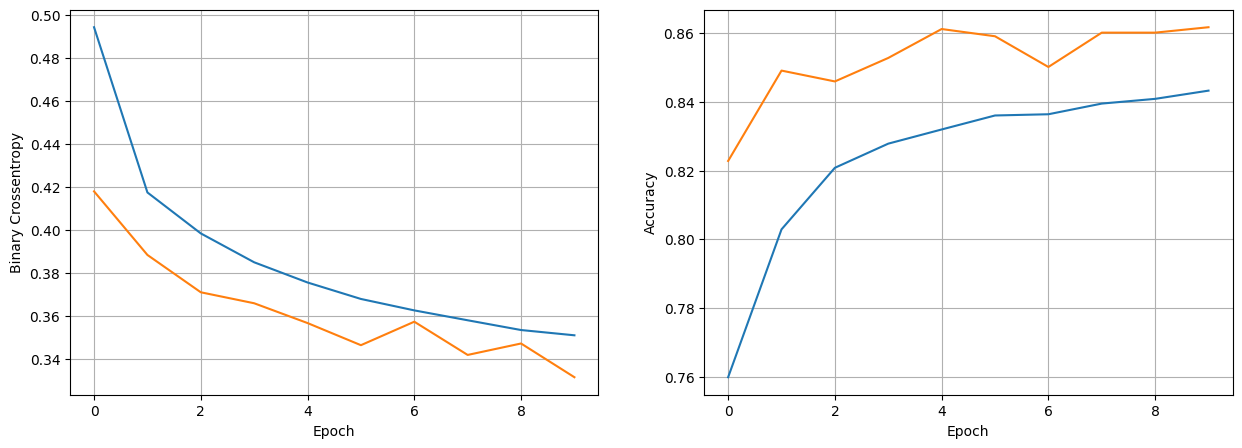

In [ ]:
plot_history(history)

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                   metrics=['accuracy'])
  history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                         validation_data=(x_valid, y_valid))

  return nn_model, history


16 0 0.01 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7890 - loss: 0.4428 - val_accuracy: 0.8565 - val_loss: 0.3494
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8426 - loss: 0.3510 - val_accuracy: 0.8391 - val_loss: 0.3728
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8499 - loss: 0.3385 - val_accuracy: 0.8544 - val_loss: 0.3503
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8517 - loss: 0.3384 - val_accuracy: 0.8528 - val_loss: 0.3437
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8461 - loss: 0.3399 - val_accuracy: 0.8570 - val_loss: 0.3509
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8528 - loss: 0.3273 - val_accuracy: 0.8449 - val_loss: 0.3621
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8521 - loss: 0.3296 - val_accuracy: 0.8670 - val_loss: 0.3202
Epoch 8/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8545 - loss: 0.3248 - val_accuracy: 0.

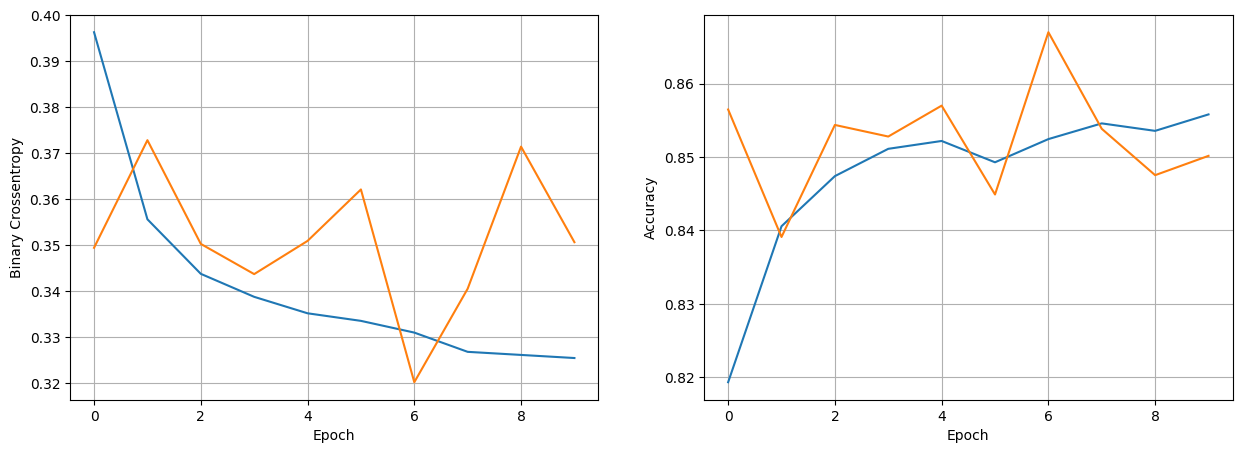

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8559 - loss: 0.3461
16 0 0.01 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7765 - loss: 0.4590 - val_accuracy: 0.8060 - val_loss: 0.4260
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8395 - loss: 0.3614 - val_accuracy: 0.8402 - val_loss: 0.3677
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8470 - loss: 0.3454 - val_accuracy: 0.8502 - val_loss: 0.3450
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8476 - loss: 0.3396 - val_accuracy: 0.8570 - val_loss: 0.3332
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8562 - loss: 0.3288 - val_accuracy: 0.8549 - val_loss: 0.3425
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8558 - loss: 0.3267 - val_accuracy: 0.8607 - val_loss: 0.3308
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8577 - loss: 0.3251 - val_accuracy: 0.8623 - val_loss: 0.3338
Epoch 8/10
307/307

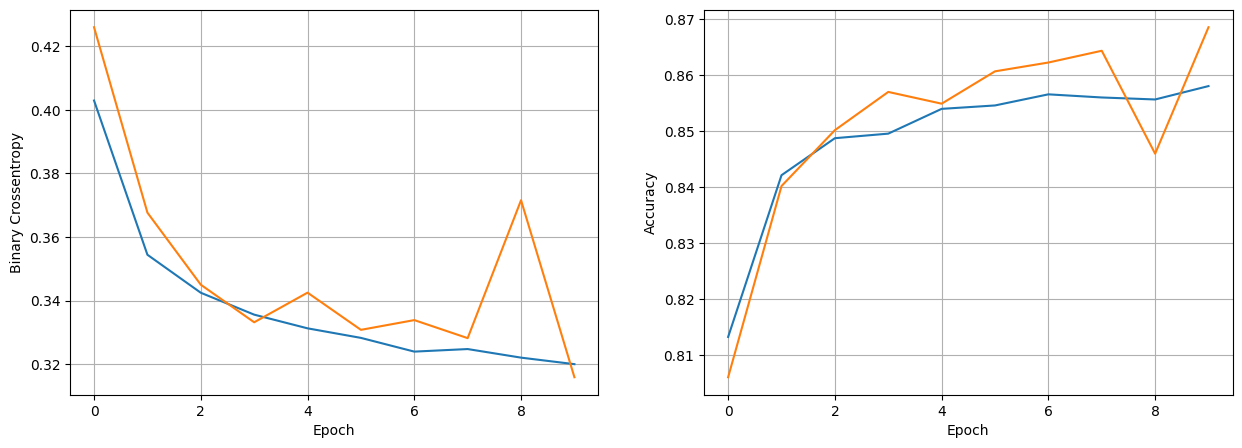

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8785 - loss: 0.3043
16 0 0.01 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7169 - loss: 0.5315 - val_accuracy: 0.8486 - val_loss: 0.3845
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8314 - loss: 0.3723 - val_accuracy: 0.8297 - val_loss: 0.3932
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8384 - loss: 0.3498 - val_accuracy: 0.8544 - val_loss: 0.3558
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8508 - loss: 0.3402 - val_accuracy: 0.8549 - val_loss: 0.3577
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8502 - loss: 0.3386 - val_accuracy: 0.8628 - val_loss: 0.3378
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8532 - loss: 0.3284 - val_accuracy: 0.8523 - val_loss: 0.3394
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8531 - loss: 0.3325 - val_accuracy: 0.8528 - val_loss: 0.3510
Epoch 8/10
154/15

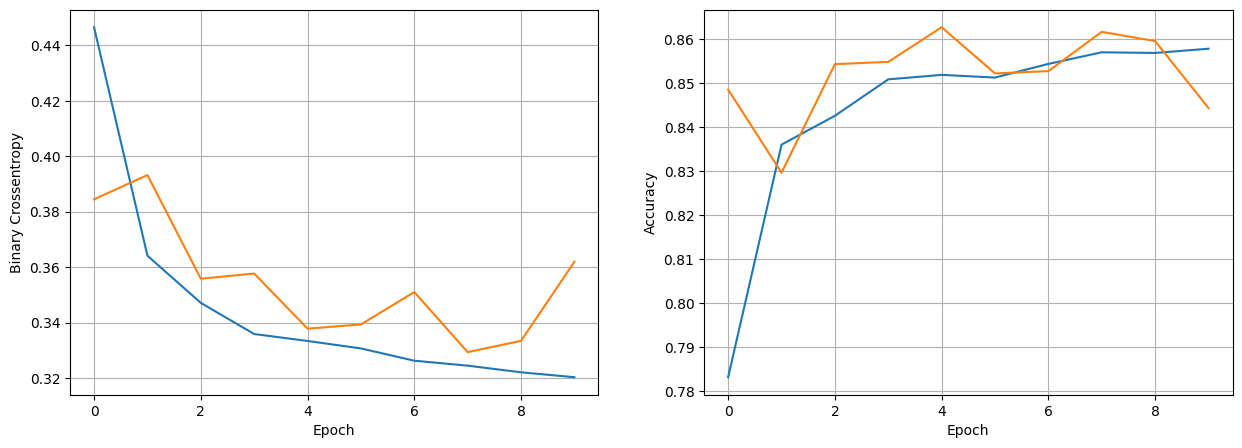

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8500 - loss: 0.3572
16 0 0.005 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7627 - loss: 0.4710 - val_accuracy: 0.8507 - val_loss: 0.3590
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8373 - loss: 0.3625 - val_accuracy: 0.8623 - val_loss: 0.3332
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8446 - loss: 0.3443 - val_accuracy: 0.8565 - val_loss: 0.3511
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8467 - loss: 0.3352 - val_accuracy: 0.8554 - val_loss: 0.3334
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8547 - loss: 0.3263 - val_accuracy: 0.8528 - val_loss: 0.3511
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8576 - loss: 0.3227 - val_accuracy: 0.8633 - val_loss: 0.3365
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8577 - loss: 0.3260 - val_accuracy: 0.8665 - val_loss: 0.3233
Epoch 8/10
614/61

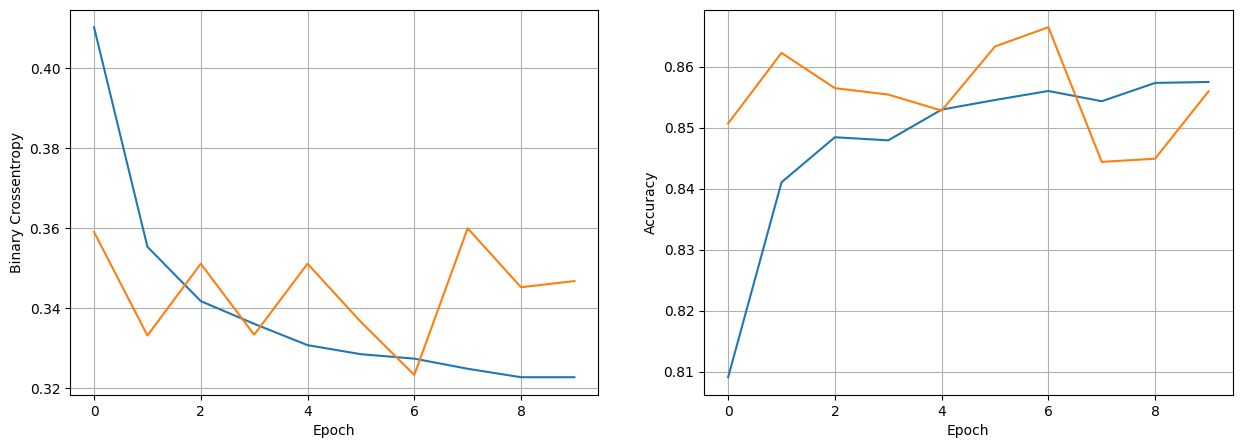

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8643 - loss: 0.3356
16 0 0.005 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7720 - loss: 0.4648 - val_accuracy: 0.8470 - val_loss: 0.3718
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8371 - loss: 0.3682 - val_accuracy: 0.8559 - val_loss: 0.3493
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8460 - loss: 0.3504 - val_accuracy: 0.8612 - val_loss: 0.3515
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8447 - loss: 0.3500 - val_accuracy: 0.8575 - val_loss: 0.3438
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8513 - loss: 0.3451 - val_accuracy: 0.8565 - val_loss: 0.3441
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8547 - loss: 0.3320 - val_accuracy: 0.8517 - val_loss: 0.3440
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8550 - loss: 0.3277 - val_accuracy: 0.8665 - val_loss: 0.3288
Epoch 8/10
307/30

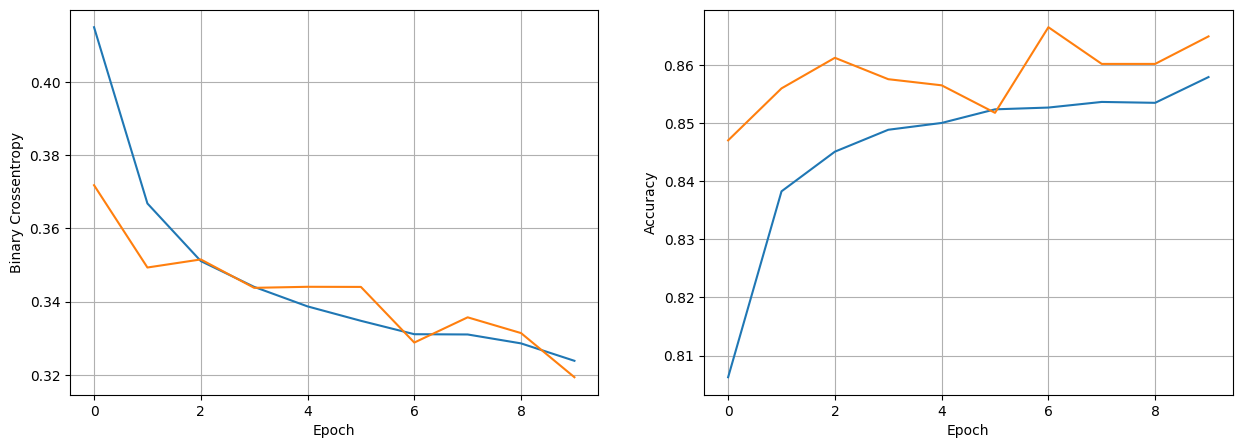

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8673 - loss: 0.3088
16 0 0.005 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7292 - loss: 0.5295 - val_accuracy: 0.8233 - val_loss: 0.3983
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8297 - loss: 0.3851 - val_accuracy: 0.8412 - val_loss: 0.3761
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8376 - loss: 0.3599 - val_accuracy: 0.8528 - val_loss: 0.3491
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8414 - loss: 0.3493 - val_accuracy: 0.8496 - val_loss: 0.3699
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8538 - loss: 0.3397 - val_accuracy: 0.8638 - val_loss: 0.3329
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8495 - loss: 0.3387 - val_accuracy: 0.8454 - val_loss: 0.3603
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8526 - loss: 0.3325 - val_accuracy: 0.8680 - val_loss: 0.3230
Epoch 8/10
154/1

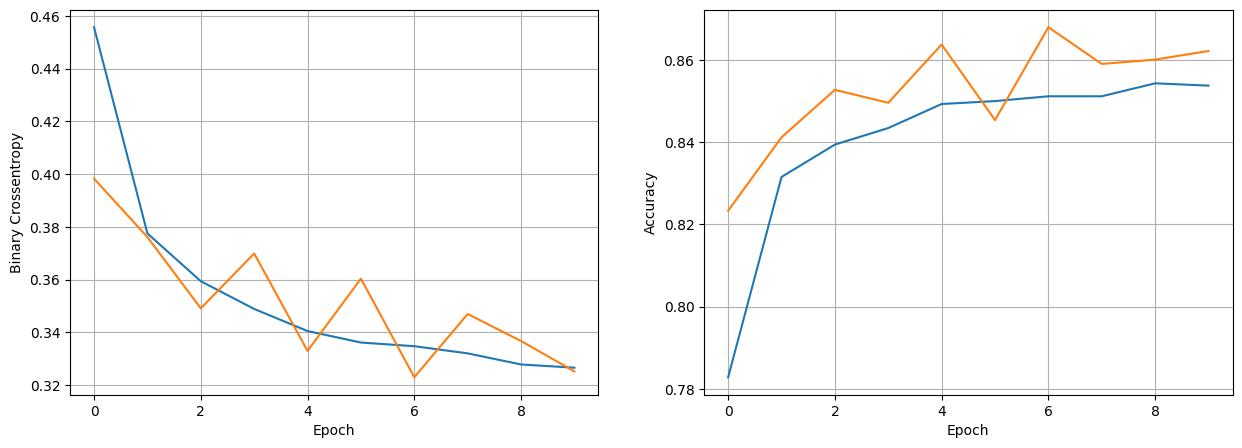

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8735 - loss: 0.3153
16 0 0.001 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6661 - loss: 0.6339 - val_accuracy: 0.8307 - val_loss: 0.4101
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8211 - loss: 0.3924 - val_accuracy: 0.8286 - val_loss: 0.3897
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8264 - loss: 0.3706 - val_accuracy: 0.8528 - val_loss: 0.3612
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8358 - loss: 0.3648 - val_accuracy: 0.8496 - val_loss: 0.3596
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8349 - loss: 0.3606 - val_accuracy: 0.8491 - val_loss: 0.3565
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8477 - loss: 0.3453 - val_accuracy: 0.8554 - val_loss: 0.3450
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8455 - loss: 0.3513 - val_accuracy: 0.8496 - val_loss: 0.3545
Epoch 8/10
614/61

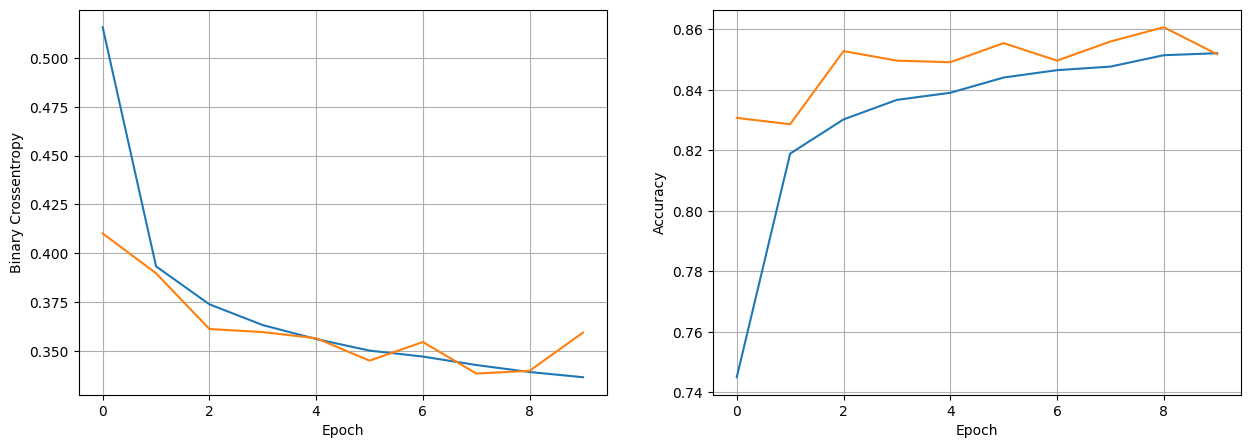

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8527 - loss: 0.3533
16 0 0.001 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7000 - loss: 0.5736 - val_accuracy: 0.8286 - val_loss: 0.4132
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8023 - loss: 0.4193 - val_accuracy: 0.8328 - val_loss: 0.3892
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8265 - loss: 0.3836 - val_accuracy: 0.8323 - val_loss: 0.3887
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8298 - loss: 0.3850 - val_accuracy: 0.8365 - val_loss: 0.3770
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8325 - loss: 0.3710 - val_accuracy: 0.8470 - val_loss: 0.3631
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8324 - loss: 0.3684 - val_accuracy: 0.8496 - val_loss: 0.3665
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8397 - loss: 0.3630 - val_accuracy: 0.8502 - val_loss: 0.3598
Epoch 8/10
307/30

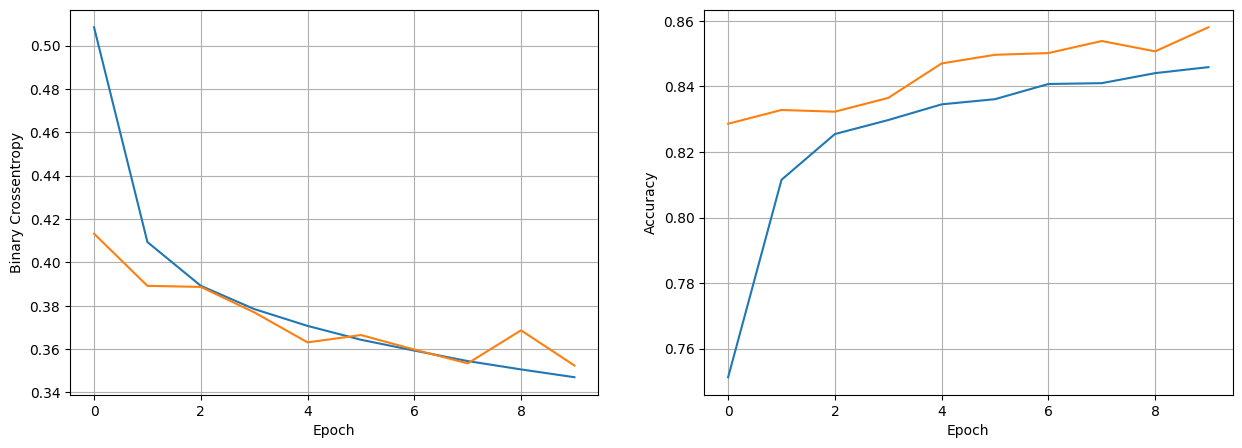

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3400
16 0 0.001 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6756 - loss: 0.6321 - val_accuracy: 0.7934 - val_loss: 0.4799
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7820 - loss: 0.4719 - val_accuracy: 0.8149 - val_loss: 0.4324
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - loss: 0.4250 - val_accuracy: 0.8233 - val_loss: 0.4113
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8160 - loss: 0.4070 - val_accuracy: 0.8349 - val_loss: 0.3940
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8300 - loss: 0.3889 - val_accuracy: 0.8349 - val_loss: 0.3862
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8356 - loss: 0.3726 - val_accuracy: 0.8233 - val_loss: 0.3882
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8378 - loss: 0.3661 - val_accuracy: 0.8523 - val_loss: 0.3650
Epoch 8/10
154/1

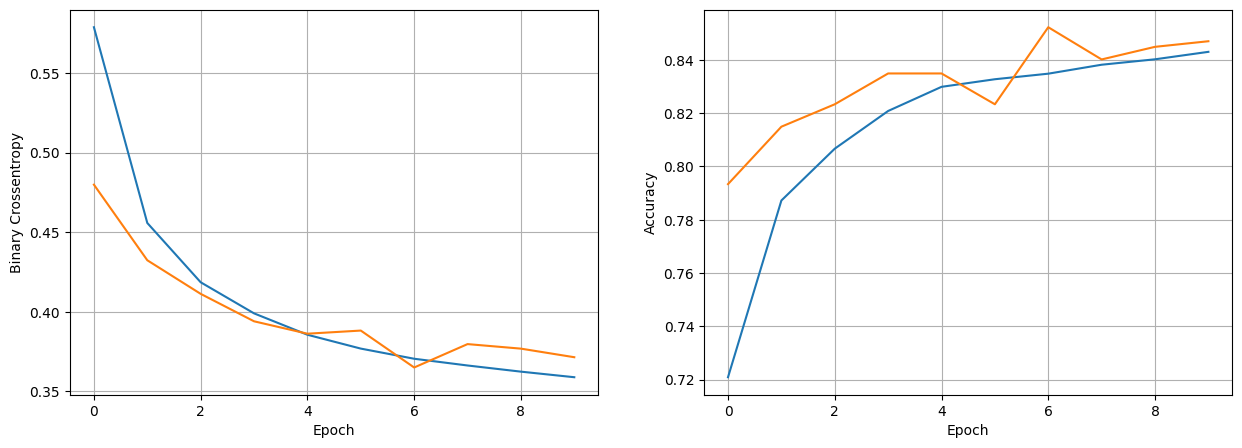

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.3619
16 0.2 0.01 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7536 - loss: 0.4990 - val_accuracy: 0.8360 - val_loss: 0.3929
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8222 - loss: 0.3975 - val_accuracy: 0.8323 - val_loss: 0.3882
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8286 - loss: 0.3887 - val_accuracy: 0.8617 - val_loss: 0.3505
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8310 - loss: 0.3824 - val_accuracy: 0.8565 - val_loss: 0.3539
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8318 - loss: 0.3773 - val_accuracy: 0.8486 - val_loss: 0.3738
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8314 - loss: 0.3863 - val_accuracy: 0.8601 - val_loss: 0.3360
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8365 - loss: 0.3697 - val_accuracy: 0.8528 - val_loss: 0.3569
Epoch 8/10
614/6

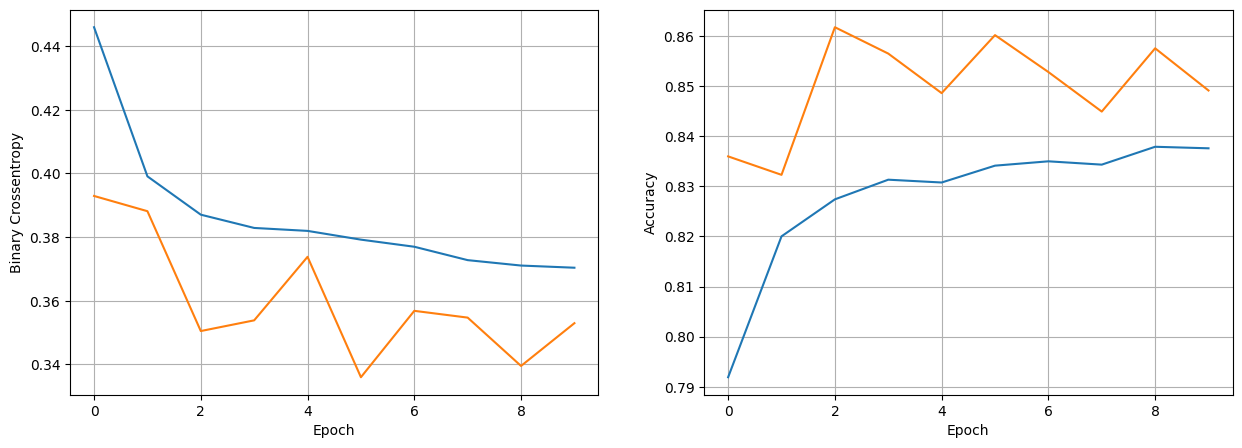

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8498 - loss: 0.3540
16 0.2 0.01 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7340 - loss: 0.5137 - val_accuracy: 0.8523 - val_loss: 0.3652
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8240 - loss: 0.4004 - val_accuracy: 0.8318 - val_loss: 0.3924
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8313 - loss: 0.3804 - val_accuracy: 0.8523 - val_loss: 0.3611
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8295 - loss: 0.3804 - val_accuracy: 0.8528 - val_loss: 0.3574
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8343 - loss: 0.3707 - val_accuracy: 0.8575 - val_loss: 0.3451
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8295 - loss: 0.3805 - val_accuracy: 0.8360 - val_loss: 0.3858
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8358 - loss: 0.3762 - val_accuracy: 0.8644 - val_loss: 0.3407
Epoch 8/10
307/3

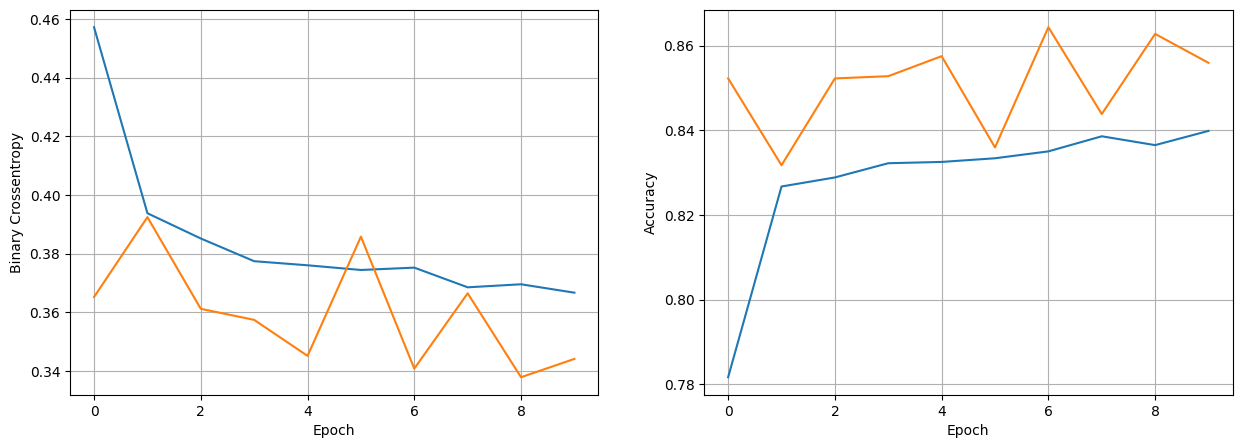

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8646 - loss: 0.3361
16 0.2 0.01 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7363 - loss: 0.5251 - val_accuracy: 0.8312 - val_loss: 0.3995
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8119 - loss: 0.4076 - val_accuracy: 0.8465 - val_loss: 0.3690
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8262 - loss: 0.3932 - val_accuracy: 0.8486 - val_loss: 0.3642
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8273 - loss: 0.3809 - val_accuracy: 0.8565 - val_loss: 0.3551
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8363 - loss: 0.3701 - val_accuracy: 0.8465 - val_loss: 0.3551
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8349 - loss: 0.3735 - val_accuracy: 0.8512 - val_loss: 0.3668
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8394 - loss: 0.3672 - val_accuracy: 0.8444 - val_loss: 0.3651
Epoch 8/10
154/

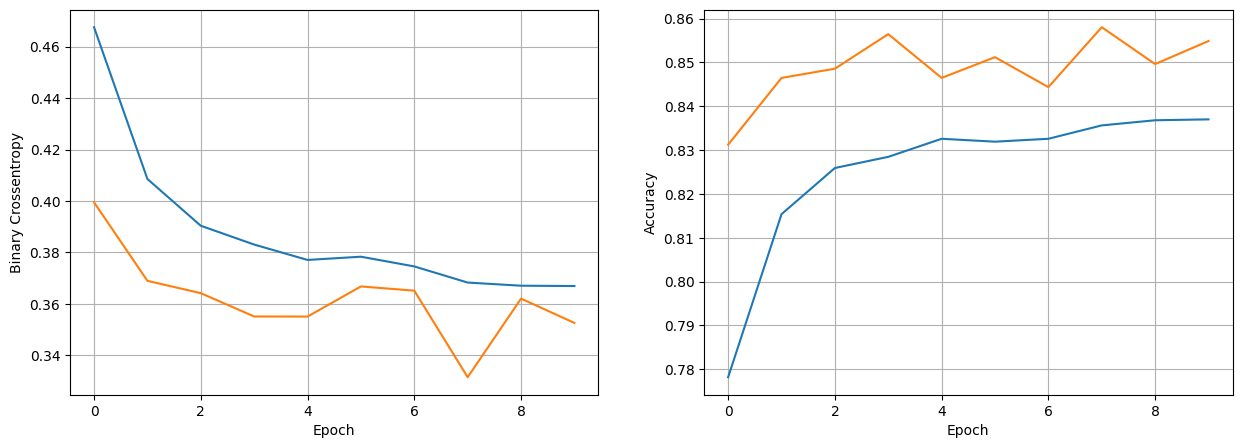

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3486
16 0.2 0.005 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7600 - loss: 0.5002 - val_accuracy: 0.8391 - val_loss: 0.3925
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8213 - loss: 0.4055 - val_accuracy: 0.8533 - val_loss: 0.3705
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8266 - loss: 0.3900 - val_accuracy: 0.8533 - val_loss: 0.3575
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8258 - loss: 0.3843 - val_accuracy: 0.8549 - val_loss: 0.3517
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8328 - loss: 0.3786 - val_accuracy: 0.8528 - val_loss: 0.3466
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8327 - loss: 0.3737 - val_accuracy: 0.8617 - val_loss: 0.3491
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8315 - loss: 0.3734 - val_accuracy: 0.8649 - val_loss: 0.3369
Epoch 8/10
6

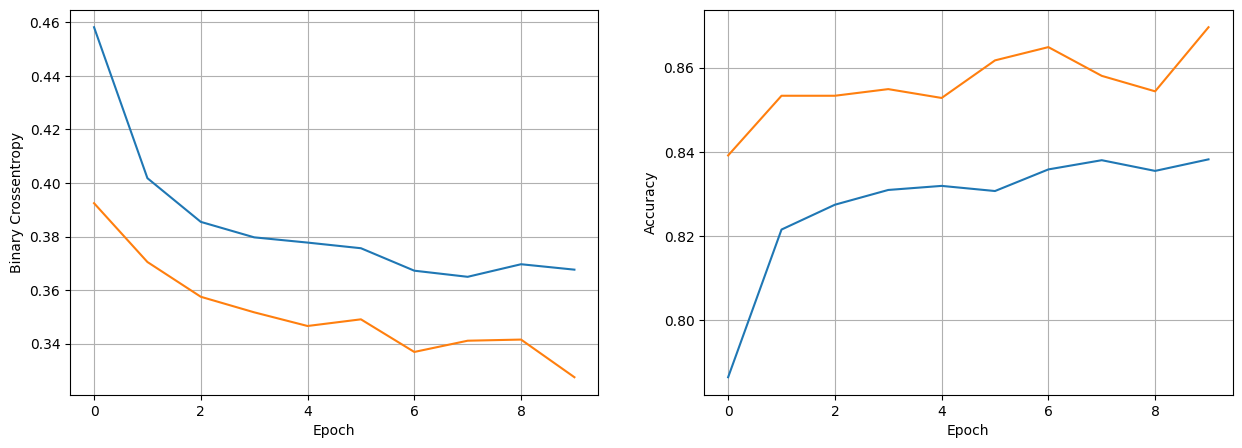

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8772 - loss: 0.3170
16 0.2 0.005 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7244 - loss: 0.5335 - val_accuracy: 0.8254 - val_loss: 0.4080
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8097 - loss: 0.4205 - val_accuracy: 0.8507 - val_loss: 0.3684
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8218 - loss: 0.3983 - val_accuracy: 0.8523 - val_loss: 0.3661
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8297 - loss: 0.3856 - val_accuracy: 0.8596 - val_loss: 0.3451
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8278 - loss: 0.3862 - val_accuracy: 0.8591 - val_loss: 0.3482
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8367 - loss: 0.3721 - val_accuracy: 0.8565 - val_loss: 0.3553
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8337 - loss: 0.3730 - val_accuracy: 0.8570 - val_loss: 0.3445
Epoch 8/10
307/

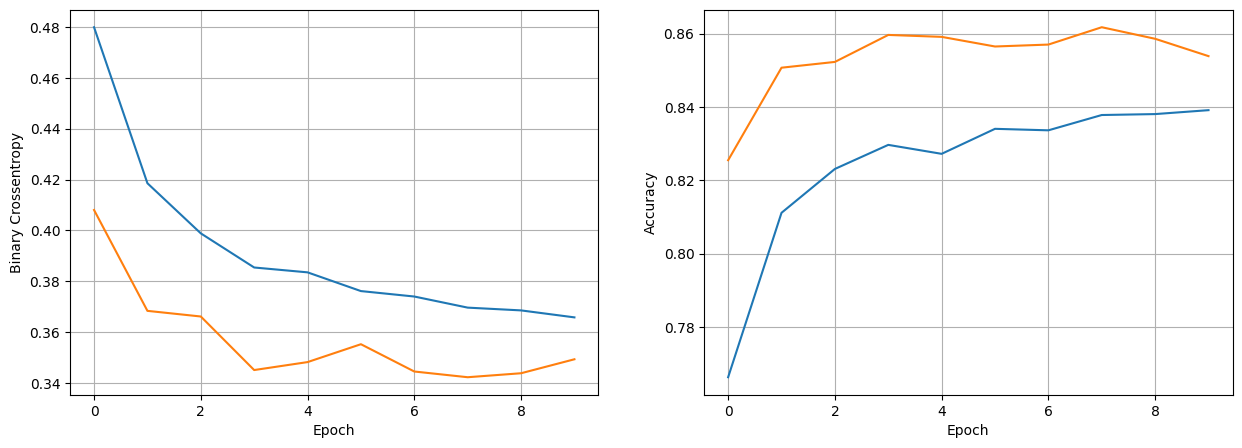

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3428
16 0.2 0.005 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7061 - loss: 0.5565 - val_accuracy: 0.8349 - val_loss: 0.4052
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7929 - loss: 0.4423 - val_accuracy: 0.8412 - val_loss: 0.3881
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8113 - loss: 0.4143 - val_accuracy: 0.8396 - val_loss: 0.3821
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8259 - loss: 0.3948 - val_accuracy: 0.8428 - val_loss: 0.3708
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8305 - loss: 0.3830 - val_accuracy: 0.8601 - val_loss: 0.3489
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8326 - loss: 0.3772 - val_accuracy: 0.8512 - val_loss: 0.3586
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8357 - loss: 0.3735 - val_accuracy: 0.8491 - val_loss: 0.3649
Epoch 8/10
154

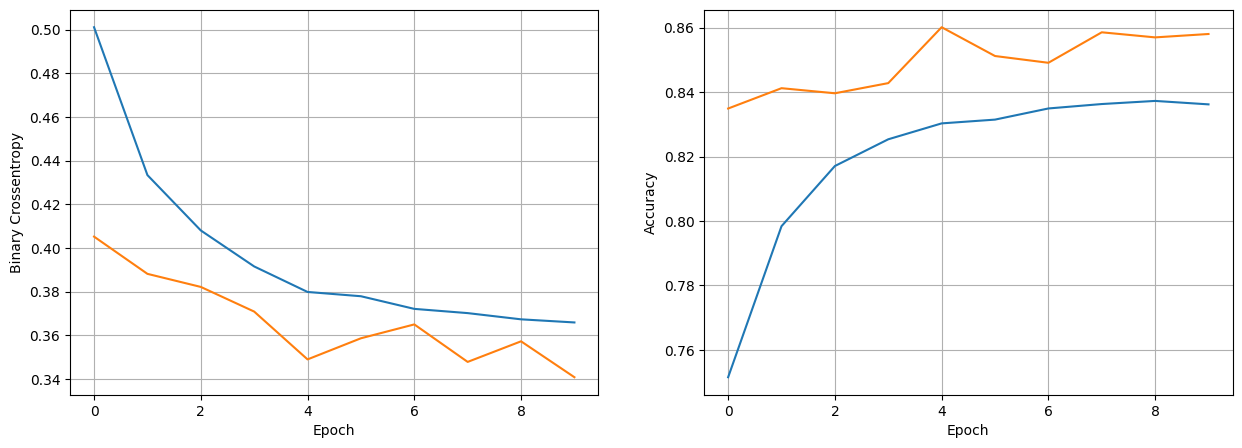

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8660 - loss: 0.3356
16 0.2 0.001 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6196 - loss: 0.6331 - val_accuracy: 0.7981 - val_loss: 0.4640
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7739 - loss: 0.4767 - val_accuracy: 0.8291 - val_loss: 0.4255
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7944 - loss: 0.4400 - val_accuracy: 0.8460 - val_loss: 0.3973
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8108 - loss: 0.4183 - val_accuracy: 0.8428 - val_loss: 0.3952
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8148 - loss: 0.4131 - val_accuracy: 0.8475 - val_loss: 0.3749
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8123 - loss: 0.4072 - val_accuracy: 0.8475 - val_loss: 0.3703
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8182 - loss: 0.4014 - val_accuracy: 0.8428 - val_loss: 0.3721
Epoch 8/10
614/

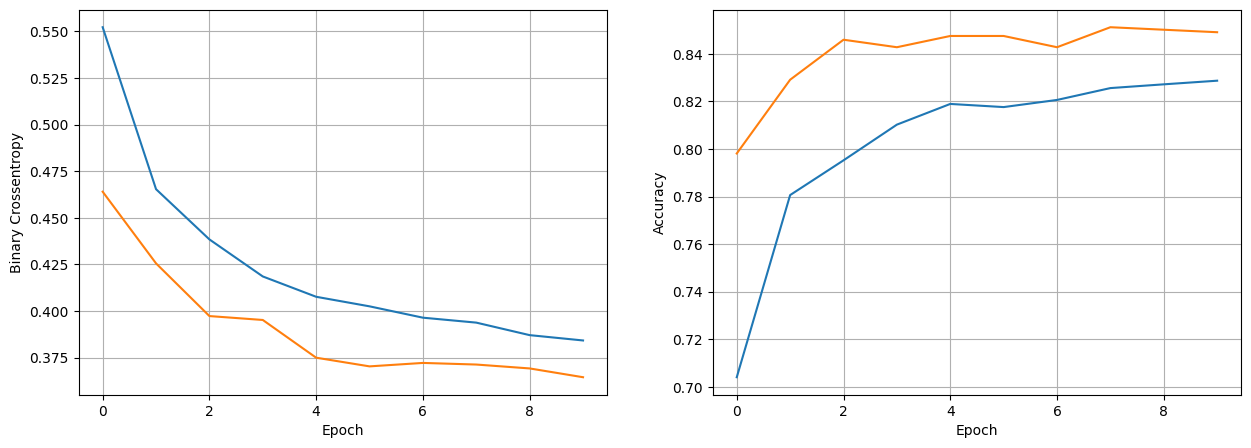

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8587 - loss: 0.3582
16 0.2 0.001 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6062 - loss: 0.6433 - val_accuracy: 0.7981 - val_loss: 0.4634
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7675 - loss: 0.4795 - val_accuracy: 0.8086 - val_loss: 0.4350
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7858 - loss: 0.4506 - val_accuracy: 0.8228 - val_loss: 0.4150
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8011 - loss: 0.4339 - val_accuracy: 0.8244 - val_loss: 0.4029
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8069 - loss: 0.4262 - val_accuracy: 0.8417 - val_loss: 0.3923
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8109 - loss: 0.4171 - val_accuracy: 0.8402 - val_loss: 0.3889
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8169 - loss: 0.4032 - val_accuracy: 0.8423 - val_loss: 0.3831
Epoch 8/10


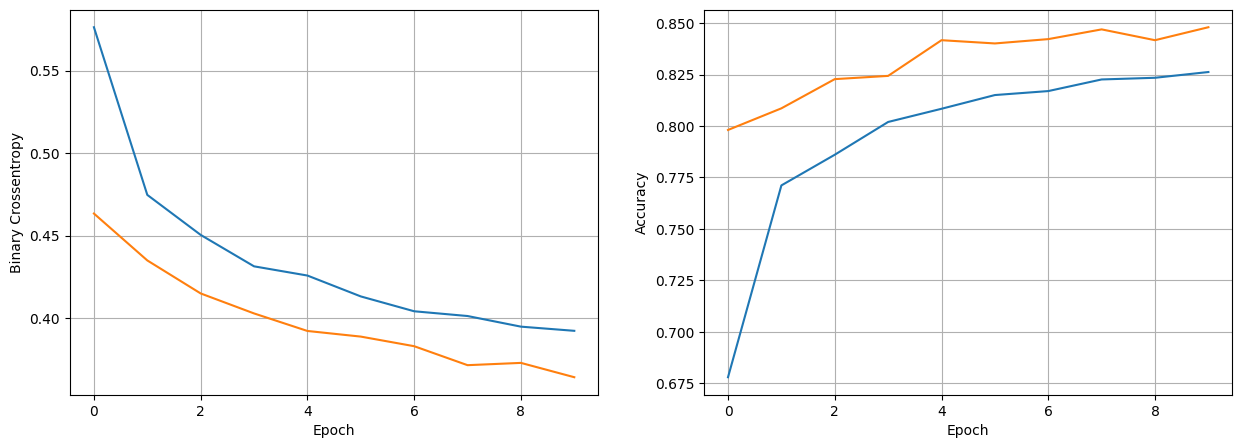

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.3500
16 0.2 0.001 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5725 - loss: 0.6754 - val_accuracy: 0.7902 - val_loss: 0.4931
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7468 - loss: 0.5088 - val_accuracy: 0.8055 - val_loss: 0.4384
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7740 - loss: 0.4651 - val_accuracy: 0.8107 - val_loss: 0.4244
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7859 - loss: 0.4492 - val_accuracy: 0.8197 - val_loss: 0.4115
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7944 - loss: 0.4381 - val_accuracy: 0.8207 - val_loss: 0.4066
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8005 - loss: 0.4324 - val_accuracy: 0.8286 - val_loss: 0.4003
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8032 - loss: 0.4264 - val_accuracy: 0.8349 - val_loss: 0.3928
Epoch 8/10
154

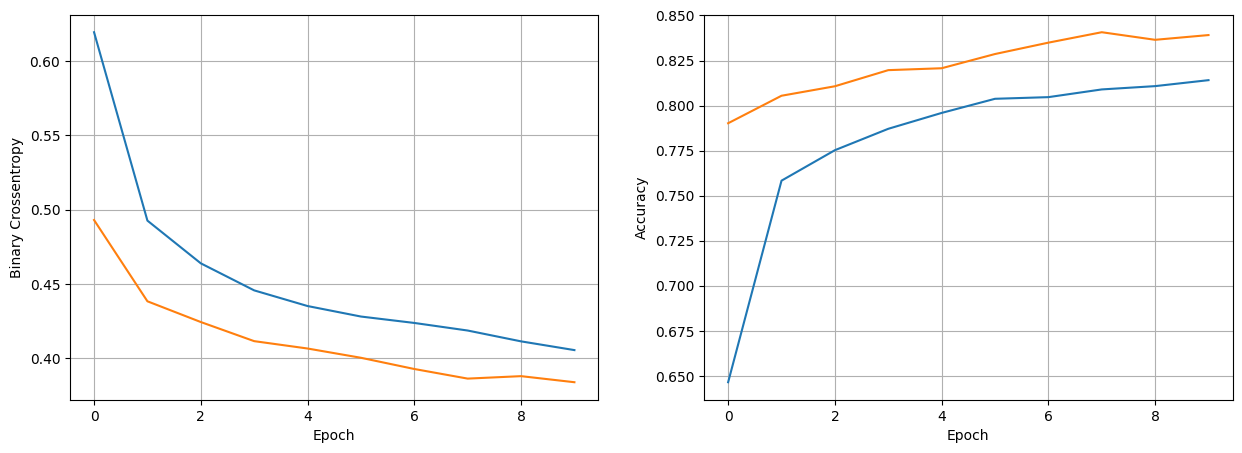

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8474 - loss: 0.3700
32 0 0.01 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7979 - loss: 0.4253 - val_accuracy: 0.8654 - val_loss: 0.3335
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8430 - loss: 0.3534 - val_accuracy: 0.8165 - val_loss: 0.3838
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8480 - loss: 0.3426 - val_accuracy: 0.8544 - val_loss: 0.3323
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8553 - loss: 0.3345 - val_accuracy: 0.8654 - val_loss: 0.3340
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8544 - loss: 0.3340 - val_accuracy: 0.8680 - val_loss: 0.3274
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8550 - loss: 0.3293 - val_accuracy: 0.8533 - val_loss: 0.3489
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8556 - loss: 0.3262 - val_accuracy: 0.8591 - val_loss: 0.3408
Epoch 8/10
614/614

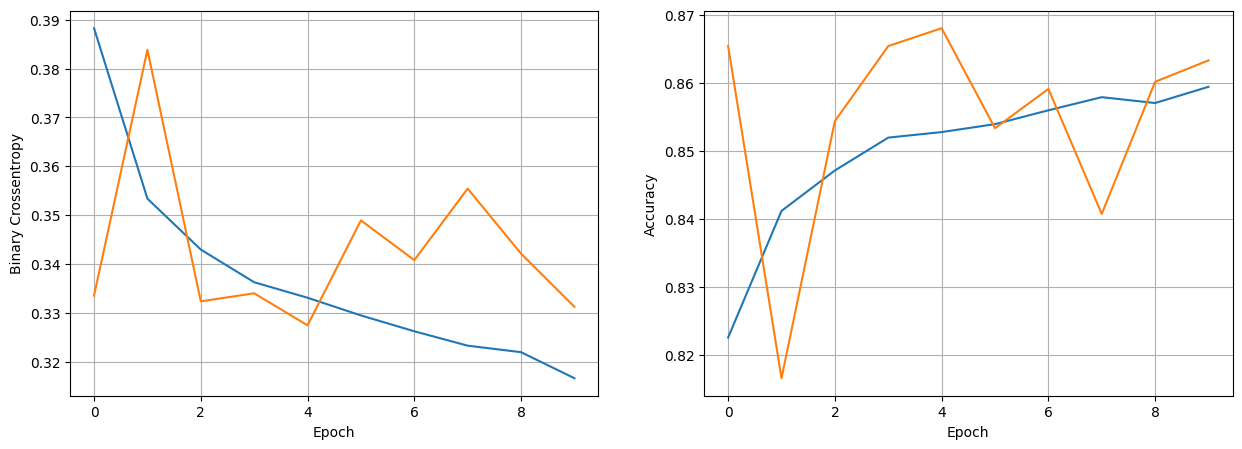

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8778 - loss: 0.3223
32 0 0.01 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7880 - loss: 0.4388 - val_accuracy: 0.8549 - val_loss: 0.3406
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8433 - loss: 0.3525 - val_accuracy: 0.8475 - val_loss: 0.3617
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8507 - loss: 0.3348 - val_accuracy: 0.8475 - val_loss: 0.3518
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8514 - loss: 0.3341 - val_accuracy: 0.8559 - val_loss: 0.3445
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8566 - loss: 0.3251 - val_accuracy: 0.8570 - val_loss: 0.3401
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8562 - loss: 0.3230 - val_accuracy: 0.8528 - val_loss: 0.3380
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8601 - loss: 0.3199 - val_accuracy: 0.8460 - val_loss: 0.3647
Epoch 8/10
307/307

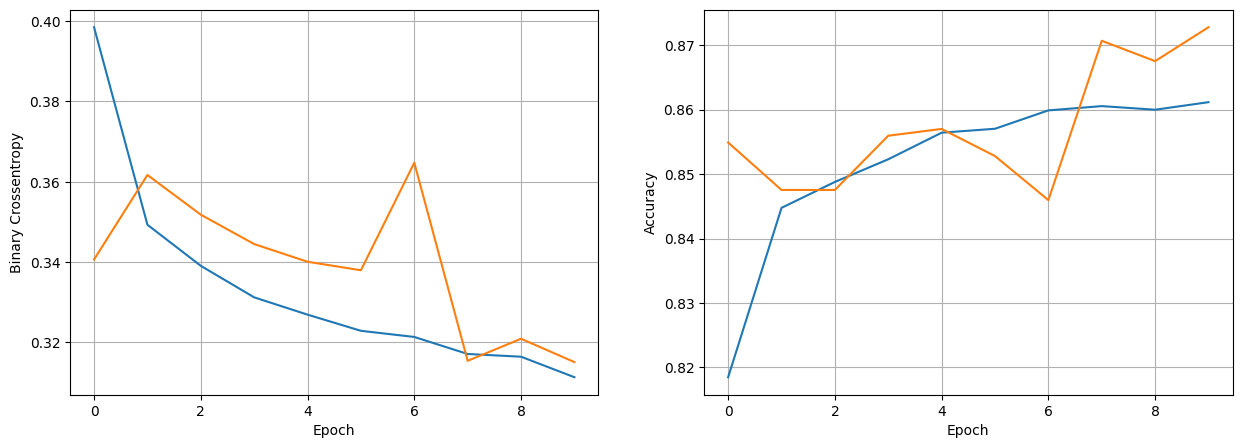

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8785 - loss: 0.3028
32 0 0.01 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7580 - loss: 0.4712 - val_accuracy: 0.8254 - val_loss: 0.4072
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8429 - loss: 0.3541 - val_accuracy: 0.8607 - val_loss: 0.3388
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8499 - loss: 0.3435 - val_accuracy: 0.8601 - val_loss: 0.3389
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8585 - loss: 0.3248 - val_accuracy: 0.8517 - val_loss: 0.3531
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8531 - loss: 0.3272 - val_accuracy: 0.8570 - val_loss: 0.3457
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8566 - loss: 0.3265 - val_accuracy: 0.8470 - val_loss: 0.3634
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8620 - loss: 0.3204 - val_accuracy: 0.8475 - val_loss: 0.3547
Epoch 8/10
154/15

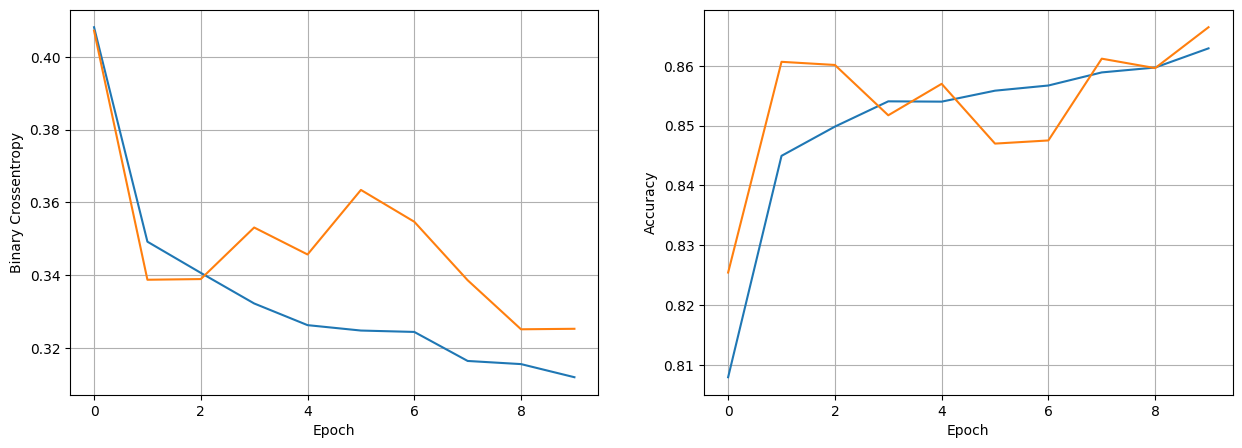

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8788 - loss: 0.3140
32 0 0.005 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7796 - loss: 0.4485 - val_accuracy: 0.7950 - val_loss: 0.4402
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8422 - loss: 0.3534 - val_accuracy: 0.8517 - val_loss: 0.3607
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8517 - loss: 0.3380 - val_accuracy: 0.8523 - val_loss: 0.3513
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8538 - loss: 0.3292 - val_accuracy: 0.8491 - val_loss: 0.3591
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8571 - loss: 0.3261 - val_accuracy: 0.8670 - val_loss: 0.3155
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8573 - loss: 0.3214 - val_accuracy: 0.8591 - val_loss: 0.3383
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8571 - loss: 0.3180 - val_accuracy: 0.8486 - val_loss: 0.3594
Epoch 8/10
614/61

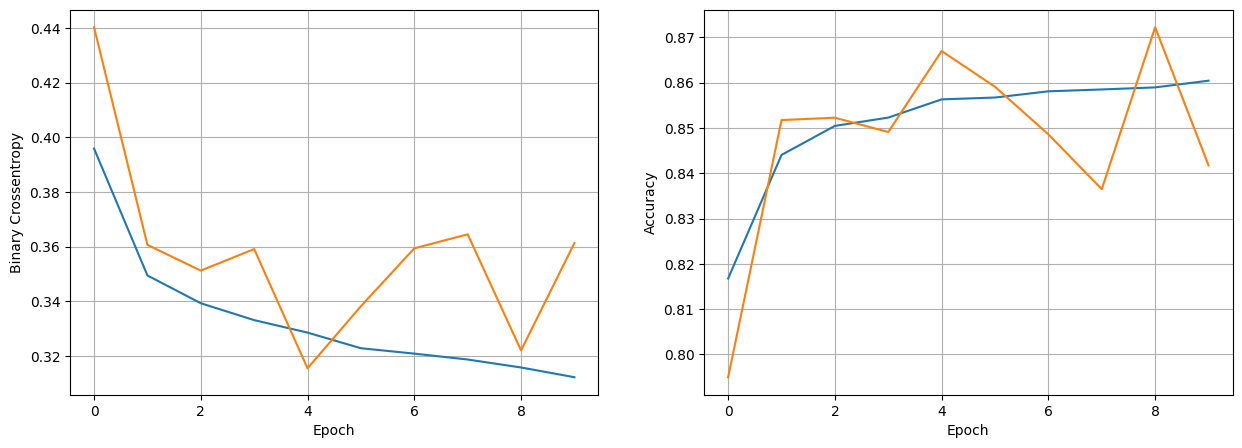

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 0.3580
32 0 0.005 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7730 - loss: 0.4528 - val_accuracy: 0.8486 - val_loss: 0.3692
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8354 - loss: 0.3615 - val_accuracy: 0.8565 - val_loss: 0.3539
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8460 - loss: 0.3396 - val_accuracy: 0.8644 - val_loss: 0.3408
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8538 - loss: 0.3302 - val_accuracy: 0.8586 - val_loss: 0.3444
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8547 - loss: 0.3273 - val_accuracy: 0.8638 - val_loss: 0.3359
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8558 - loss: 0.3237 - val_accuracy: 0.8612 - val_loss: 0.3371
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8599 - loss: 0.3205 - val_accuracy: 0.8659 - val_loss: 0.3157
Epoch 8/10
307/30

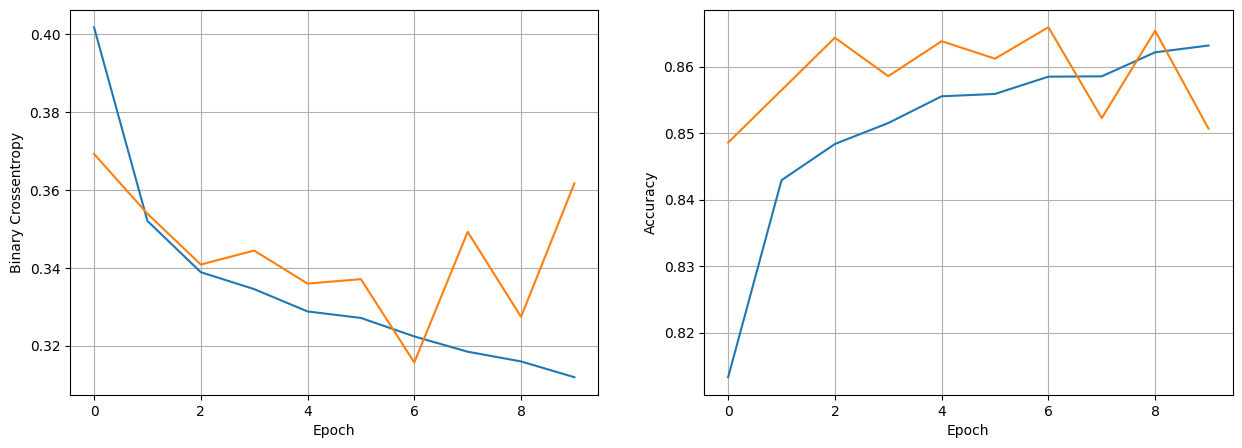

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8560 - loss: 0.3542
32 0 0.005 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7016 - loss: 0.5350 - val_accuracy: 0.8249 - val_loss: 0.4184
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8398 - loss: 0.3649 - val_accuracy: 0.8607 - val_loss: 0.3525
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8449 - loss: 0.3485 - val_accuracy: 0.8465 - val_loss: 0.3603
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.3388 - val_accuracy: 0.8601 - val_loss: 0.3485
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8542 - loss: 0.3333 - val_accuracy: 0.8512 - val_loss: 0.3583
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8505 - loss: 0.3339 - val_accuracy: 0.8544 - val_loss: 0.3385
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8588 - loss: 0.3197 - val_accuracy: 0.8538 - val_loss: 0.3465
Epoch 8/10
154/1

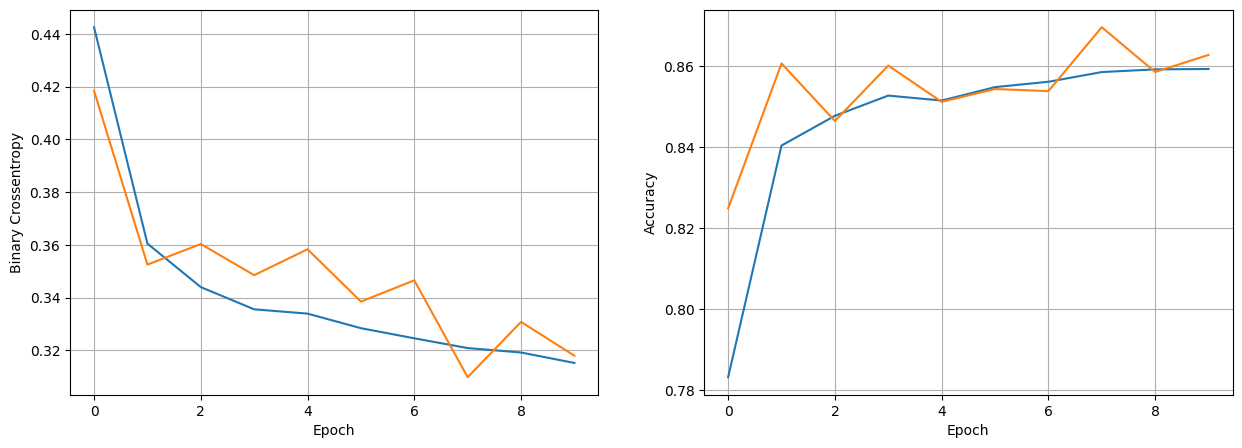

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3109
32 0 0.001 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7599 - loss: 0.4945 - val_accuracy: 0.8496 - val_loss: 0.3681
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8348 - loss: 0.3726 - val_accuracy: 0.8381 - val_loss: 0.3787
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8422 - loss: 0.3540 - val_accuracy: 0.8502 - val_loss: 0.3610
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8471 - loss: 0.3498 - val_accuracy: 0.8444 - val_loss: 0.3654
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8471 - loss: 0.3461 - val_accuracy: 0.8607 - val_loss: 0.3441
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8541 - loss: 0.3327 - val_accuracy: 0.8601 - val_loss: 0.3415
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8574 - loss: 0.3297 - val_accuracy: 0.8402 - val_loss: 0.3641
Epoch 8/10
614/61

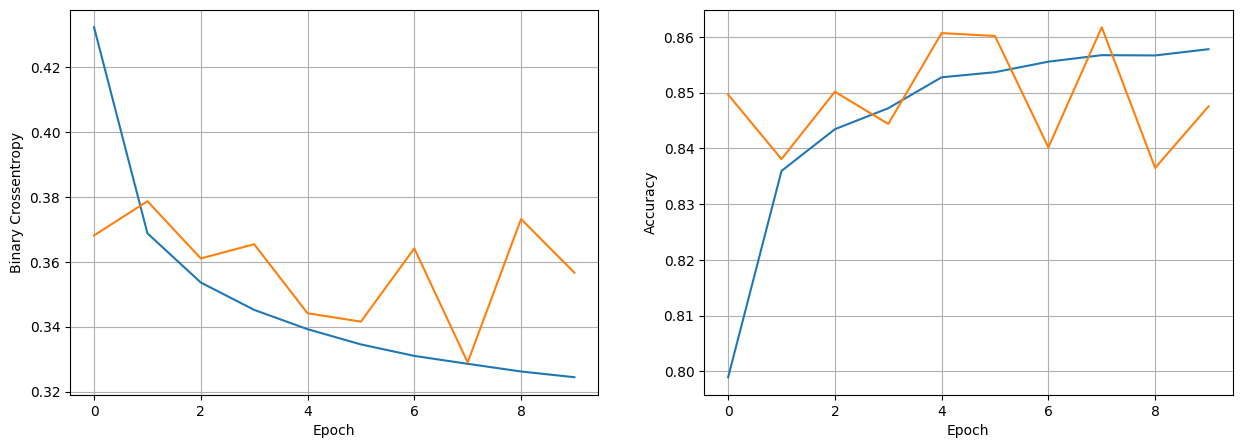

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8535 - loss: 0.3462
32 0 0.001 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7523 - loss: 0.5168 - val_accuracy: 0.8349 - val_loss: 0.3945
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8228 - loss: 0.3894 - val_accuracy: 0.8312 - val_loss: 0.3970
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8383 - loss: 0.3633 - val_accuracy: 0.8533 - val_loss: 0.3602
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8369 - loss: 0.3662 - val_accuracy: 0.8470 - val_loss: 0.3655
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8492 - loss: 0.3458 - val_accuracy: 0.8554 - val_loss: 0.3481
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8423 - loss: 0.3509 - val_accuracy: 0.8433 - val_loss: 0.3724
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8508 - loss: 0.3398 - val_accuracy: 0.8507 - val_loss: 0.3599
Epoch 8/10
307/30

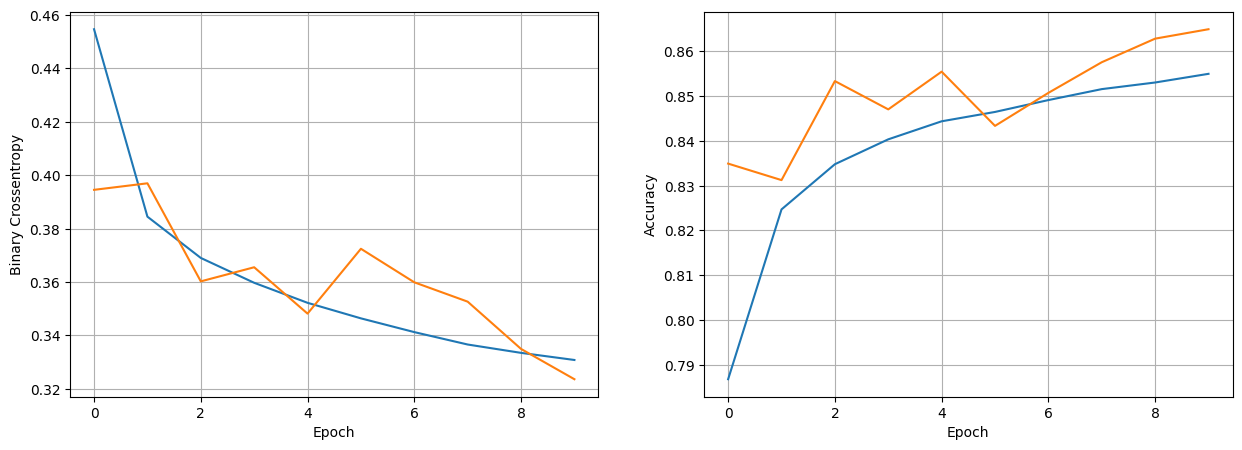

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8774 - loss: 0.3105
32 0 0.001 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7222 - loss: 0.5425 - val_accuracy: 0.8086 - val_loss: 0.4365
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8004 - loss: 0.4191 - val_accuracy: 0.8307 - val_loss: 0.3947
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8246 - loss: 0.3933 - val_accuracy: 0.8596 - val_loss: 0.3629
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8335 - loss: 0.3750 - val_accuracy: 0.8475 - val_loss: 0.3685
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8384 - loss: 0.3701 - val_accuracy: 0.8586 - val_loss: 0.3530
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8466 - loss: 0.3564 - val_accuracy: 0.8638 - val_loss: 0.3482
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8494 - loss: 0.3484 - val_accuracy: 0.8612 - val_loss: 0.3493
Epoch 8/10
154/1

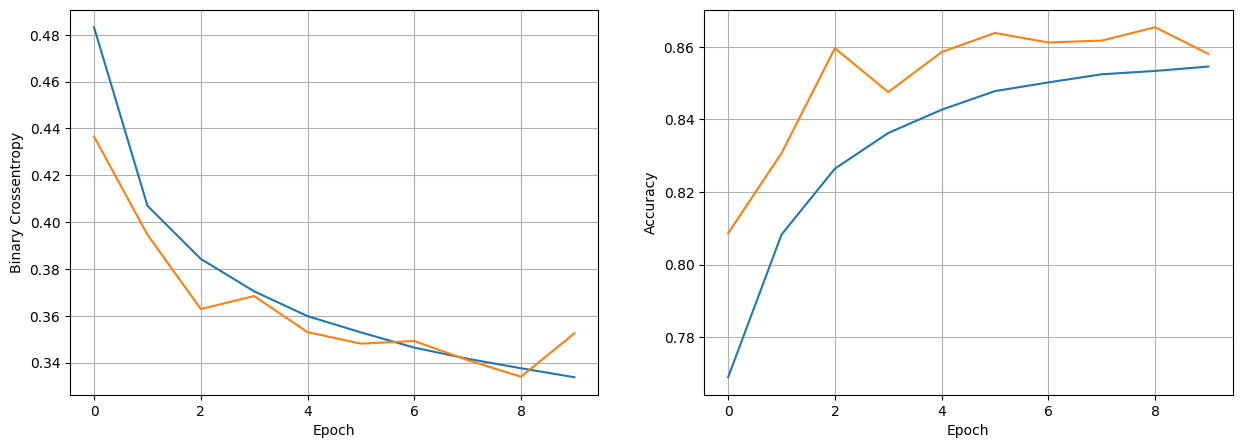

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3436
32 0.2 0.01 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7596 - loss: 0.4858 - val_accuracy: 0.8470 - val_loss: 0.3629
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8310 - loss: 0.3783 - val_accuracy: 0.8633 - val_loss: 0.3624
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8417 - loss: 0.3674 - val_accuracy: 0.8533 - val_loss: 0.3540
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8345 - loss: 0.3619 - val_accuracy: 0.8580 - val_loss: 0.3695
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8410 - loss: 0.3628 - val_accuracy: 0.8533 - val_loss: 0.3428
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8381 - loss: 0.3685 - val_accuracy: 0.8628 - val_loss: 0.3347
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8433 - loss: 0.3530 - val_accuracy: 0.8570 - val_loss: 0.3479
Epoch 8/10
614/6

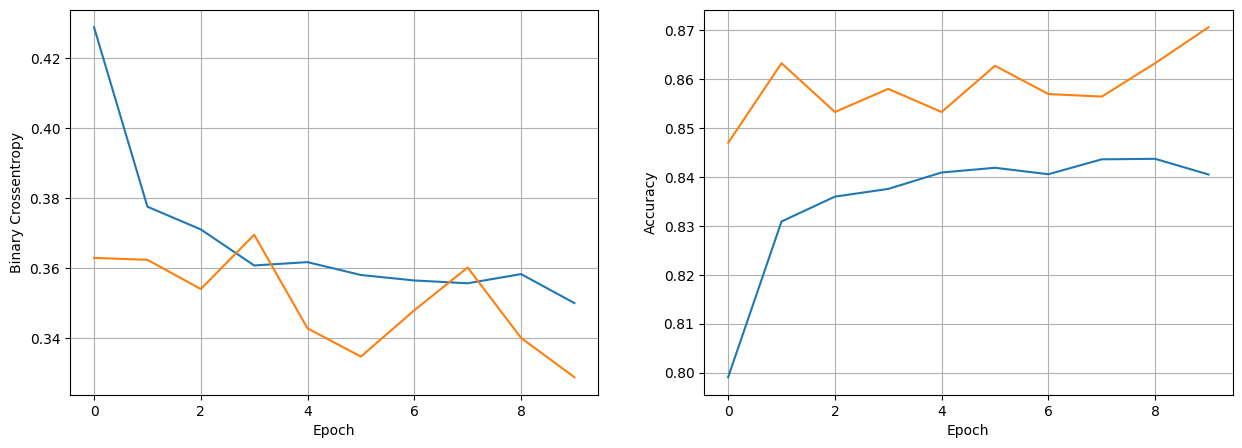

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8749 - loss: 0.3203
32 0.2 0.01 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7656 - loss: 0.4768 - val_accuracy: 0.8491 - val_loss: 0.3698
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8293 - loss: 0.3829 - val_accuracy: 0.8586 - val_loss: 0.3617
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8393 - loss: 0.3653 - val_accuracy: 0.8638 - val_loss: 0.3453
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8350 - loss: 0.3647 - val_accuracy: 0.8517 - val_loss: 0.3560
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8380 - loss: 0.3630 - val_accuracy: 0.8628 - val_loss: 0.3532
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8438 - loss: 0.3484 - val_accuracy: 0.8607 - val_loss: 0.3443
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8403 - loss: 0.3541 - val_accuracy: 0.8659 - val_loss: 0.3412
Epoch 8/10
307/3

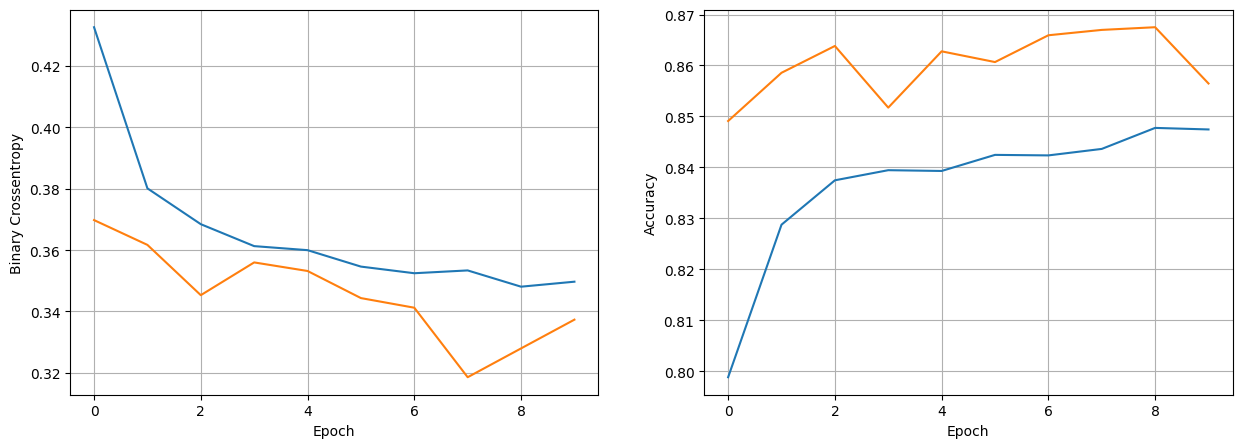

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8589 - loss: 0.3332
32 0.2 0.01 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7556 - loss: 0.4756 - val_accuracy: 0.8580 - val_loss: 0.3636
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8270 - loss: 0.3834 - val_accuracy: 0.8617 - val_loss: 0.3506
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8357 - loss: 0.3666 - val_accuracy: 0.8607 - val_loss: 0.3510
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8380 - loss: 0.3688 - val_accuracy: 0.8628 - val_loss: 0.3374
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8392 - loss: 0.3622 - val_accuracy: 0.8612 - val_loss: 0.3662
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8479 - loss: 0.3494 - val_accuracy: 0.8344 - val_loss: 0.3682
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8437 - loss: 0.3449 - val_accuracy: 0.8601 - val_loss: 0.3337
Epoch 8/10
154/

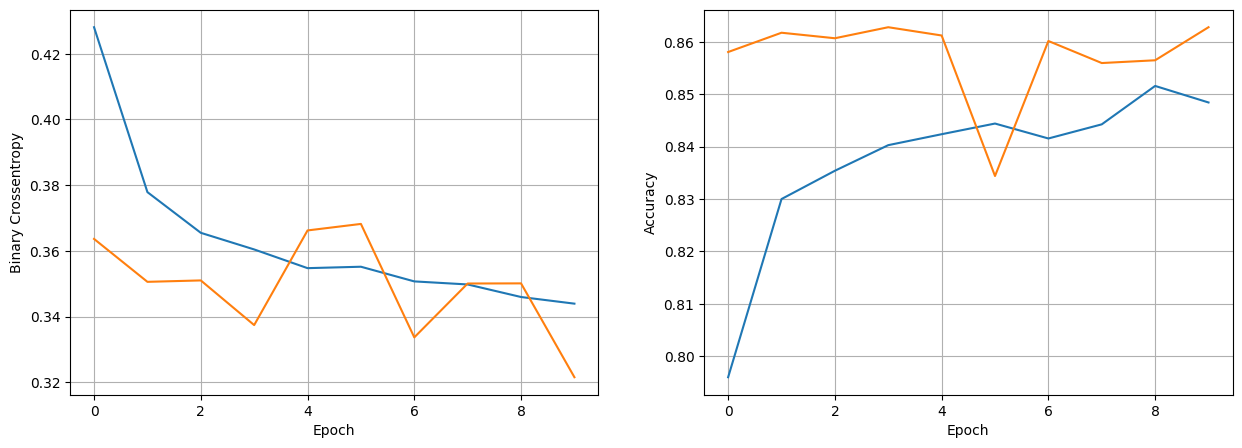

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8700 - loss: 0.3145
32 0.2 0.005 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7568 - loss: 0.4859 - val_accuracy: 0.8076 - val_loss: 0.4145
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8339 - loss: 0.3767 - val_accuracy: 0.8517 - val_loss: 0.3575
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8337 - loss: 0.3738 - val_accuracy: 0.8344 - val_loss: 0.3787
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8335 - loss: 0.3648 - val_accuracy: 0.8528 - val_loss: 0.3465
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8383 - loss: 0.3621 - val_accuracy: 0.8675 - val_loss: 0.3388
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8416 - loss: 0.3558 - val_accuracy: 0.8628 - val_loss: 0.3359
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8412 - loss: 0.3580 - val_accuracy: 0.8659 - val_loss: 0.3345
Epoch 8/10
614/

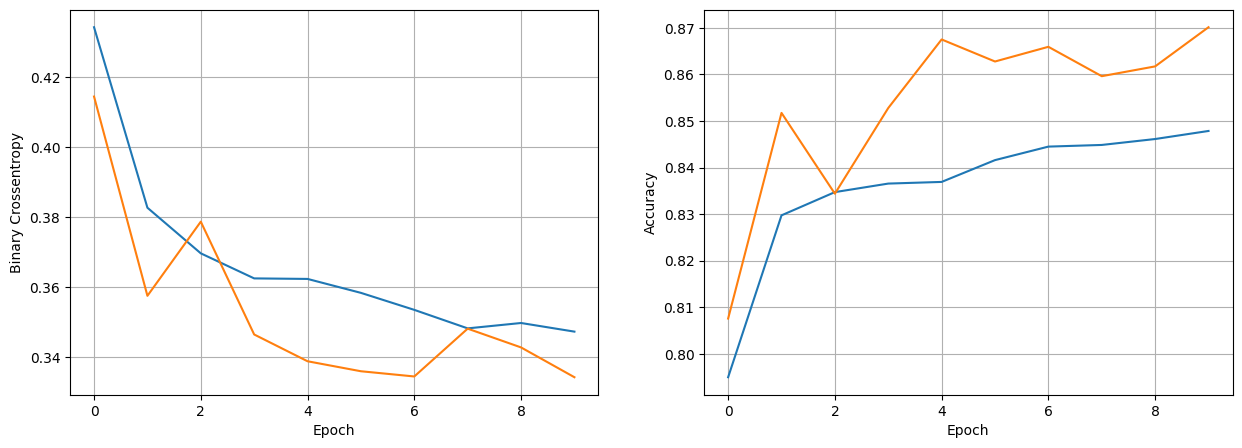

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8791 - loss: 0.3284
32 0.2 0.005 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7524 - loss: 0.4942 - val_accuracy: 0.8454 - val_loss: 0.3782
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8178 - loss: 0.3963 - val_accuracy: 0.8512 - val_loss: 0.3532
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8338 - loss: 0.3692 - val_accuracy: 0.8523 - val_loss: 0.3548
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8358 - loss: 0.3644 - val_accuracy: 0.8580 - val_loss: 0.3453
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8394 - loss: 0.3576 - val_accuracy: 0.8680 - val_loss: 0.3319
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8434 - loss: 0.3576 - val_accuracy: 0.8628 - val_loss: 0.3432
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8414 - loss: 0.3527 - val_accuracy: 0.8696 - val_loss: 0.3317
Epoch 8/10
307/

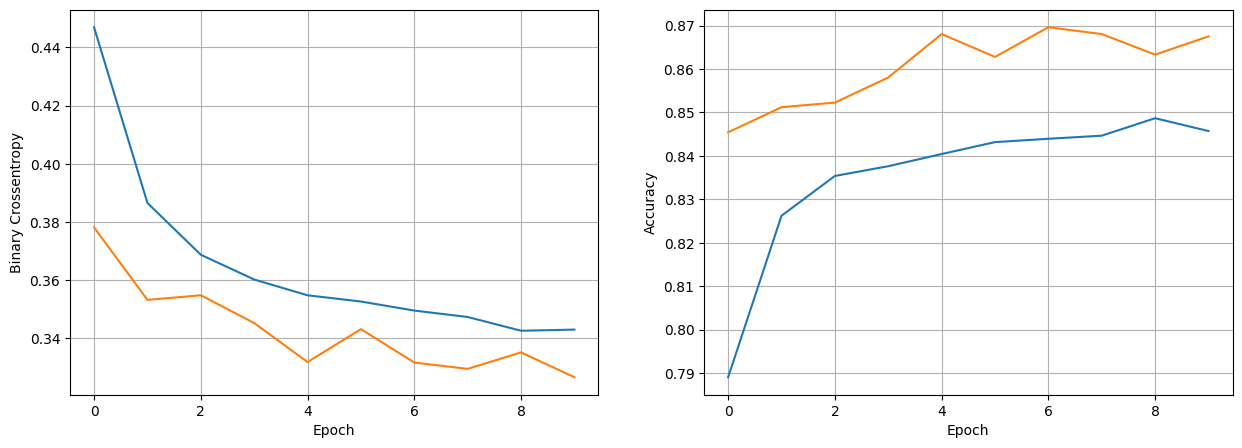

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8803 - loss: 0.3204
32 0.2 0.005 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7411 - loss: 0.5203 - val_accuracy: 0.8381 - val_loss: 0.3817
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8129 - loss: 0.4060 - val_accuracy: 0.8601 - val_loss: 0.3456
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8271 - loss: 0.3865 - val_accuracy: 0.8517 - val_loss: 0.3524
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8388 - loss: 0.3675 - val_accuracy: 0.8523 - val_loss: 0.3588
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8396 - loss: 0.3592 - val_accuracy: 0.8428 - val_loss: 0.3626
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8393 - loss: 0.3587 - val_accuracy: 0.8549 - val_loss: 0.3556
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8449 - loss: 0.3504 - val_accuracy: 0.8528 - val_loss: 0.3493
Epoch 8/10
154

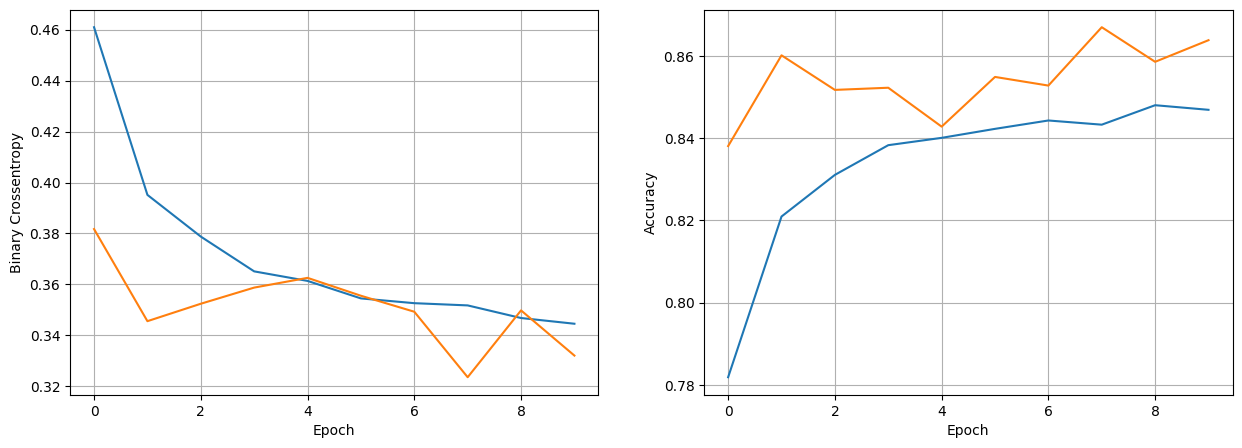

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3238
32 0.2 0.001 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6982 - loss: 0.5550 - val_accuracy: 0.8202 - val_loss: 0.4150
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8045 - loss: 0.4244 - val_accuracy: 0.8423 - val_loss: 0.3857
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8184 - loss: 0.4001 - val_accuracy: 0.8512 - val_loss: 0.3667
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8323 - loss: 0.3805 - val_accuracy: 0.8507 - val_loss: 0.3601
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8331 - loss: 0.3757 - val_accuracy: 0.8538 - val_loss: 0.3558
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8356 - loss: 0.3680 - val_accuracy: 0.8591 - val_loss: 0.3464
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8374 - loss: 0.3640 - val_accuracy: 0.8607 - val_loss: 0.3431
Epoch 8/10
614/

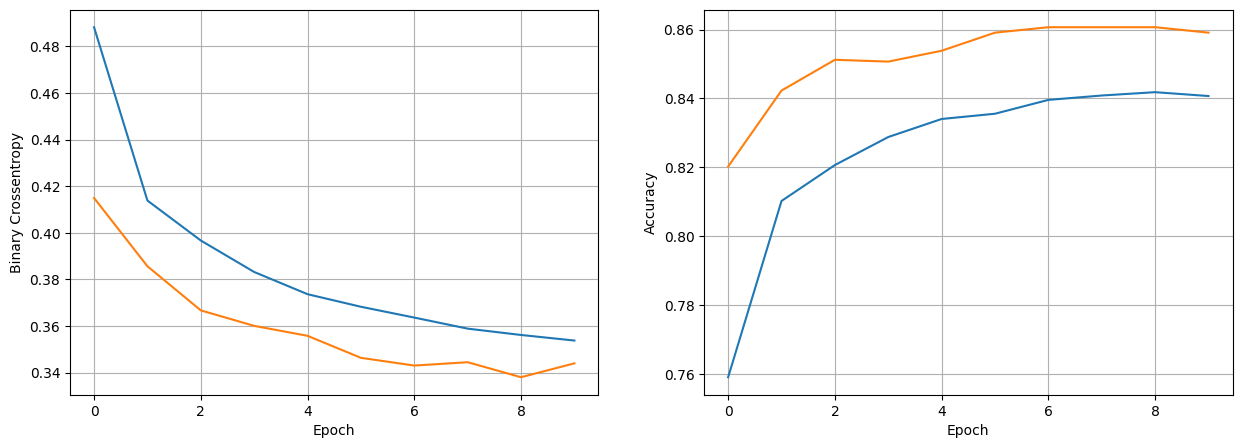

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 0.3379
32 0.2 0.001 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6739 - loss: 0.5808 - val_accuracy: 0.8254 - val_loss: 0.4174
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7994 - loss: 0.4357 - val_accuracy: 0.8365 - val_loss: 0.3934
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8069 - loss: 0.4166 - val_accuracy: 0.8412 - val_loss: 0.3874
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8186 - loss: 0.4025 - val_accuracy: 0.8496 - val_loss: 0.3715
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8262 - loss: 0.3871 - val_accuracy: 0.8486 - val_loss: 0.3761
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8314 - loss: 0.3803 - val_accuracy: 0.8601 - val_loss: 0.3510
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8346 - loss: 0.3722 - val_accuracy: 0.8570 - val_loss: 0.3650
Epoch 8/10
307/

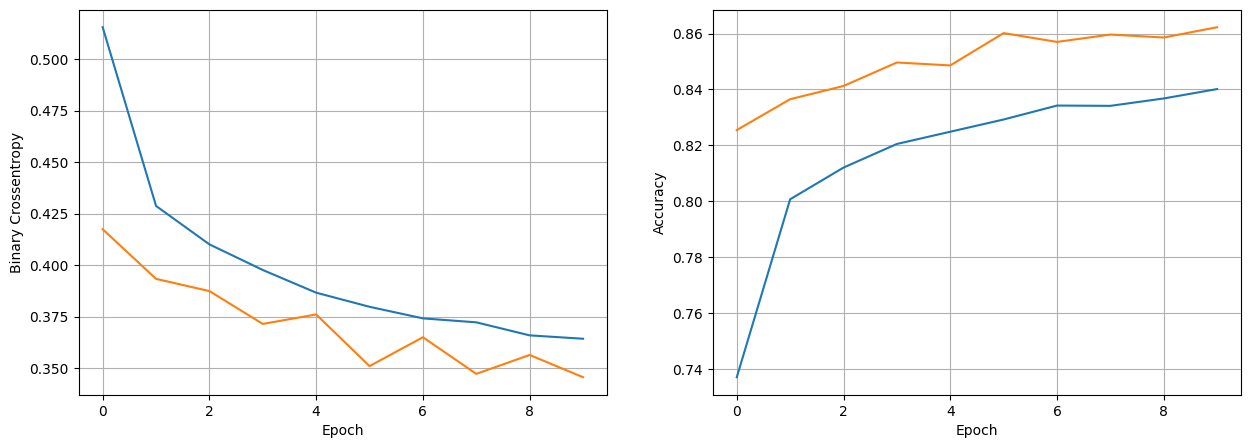

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8701 - loss: 0.3357
32 0.2 0.001 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6395 - loss: 0.6173 - val_accuracy: 0.8097 - val_loss: 0.4399
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7816 - loss: 0.4608 - val_accuracy: 0.8270 - val_loss: 0.4149
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7945 - loss: 0.4347 - val_accuracy: 0.8412 - val_loss: 0.3904
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8086 - loss: 0.4189 - val_accuracy: 0.8365 - val_loss: 0.3904
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8143 - loss: 0.4052 - val_accuracy: 0.8544 - val_loss: 0.3712
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8189 - loss: 0.3989 - val_accuracy: 0.8449 - val_loss: 0.3753
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8261 - loss: 0.3893 - val_accuracy: 0.8486 - val_loss: 0.3668
Epoch 8/10
154

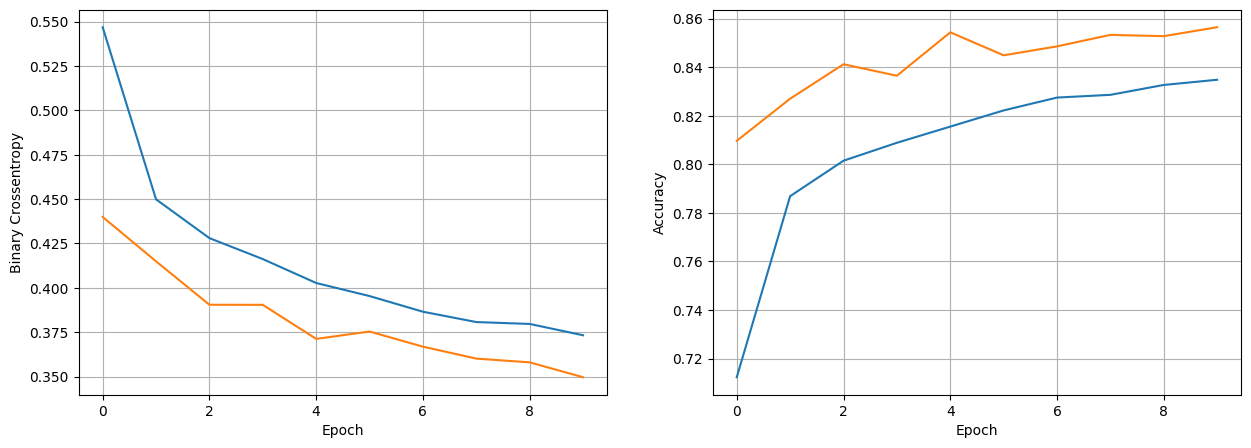

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3381
64 0 0.01 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8024 - loss: 0.4206 - val_accuracy: 0.8360 - val_loss: 0.3914
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8406 - loss: 0.3539 - val_accuracy: 0.8181 - val_loss: 0.3895
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8481 - loss: 0.3416 - val_accuracy: 0.8565 - val_loss: 0.3604
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8569 - loss: 0.3323 - val_accuracy: 0.8212 - val_loss: 0.4082
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8527 - loss: 0.3294 - val_accuracy: 0.8344 - val_loss: 0.3857
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8555 - loss: 0.3261 - val_accuracy: 0.8538 - val_loss: 0.3553
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8611 - loss: 0.3138 - val_accuracy: 0.8444 - val_loss: 0.3756
Epoch 8/10
614/614

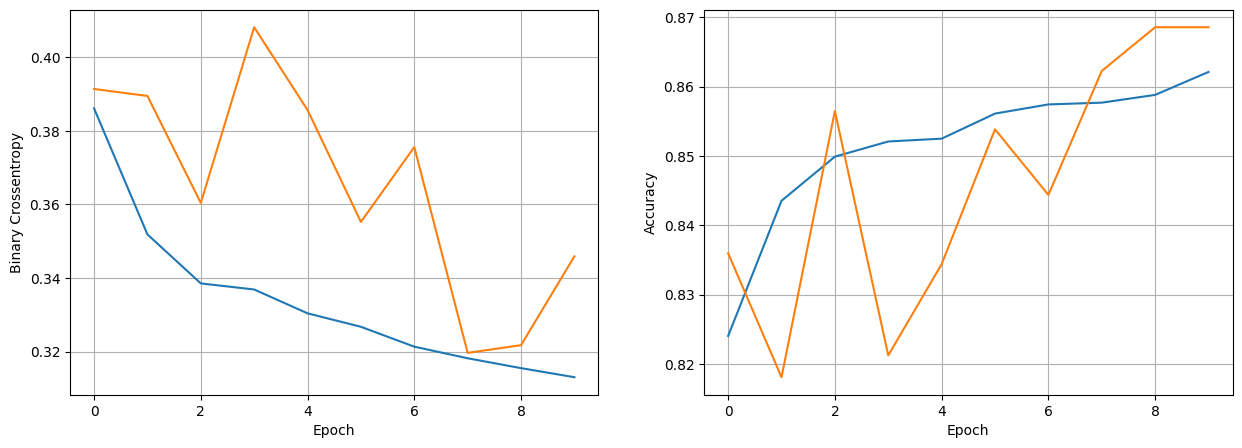

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8817 - loss: 0.3282
64 0 0.01 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8011 - loss: 0.4237 - val_accuracy: 0.8544 - val_loss: 0.3572
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8446 - loss: 0.3498 - val_accuracy: 0.8596 - val_loss: 0.3446
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8471 - loss: 0.3432 - val_accuracy: 0.8528 - val_loss: 0.3553
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8566 - loss: 0.3337 - val_accuracy: 0.8644 - val_loss: 0.3201
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8583 - loss: 0.3220 - val_accuracy: 0.8575 - val_loss: 0.3409
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8560 - loss: 0.3194 - val_accuracy: 0.8649 - val_loss: 0.3248
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8576 - loss: 0.3205 - val_accuracy: 0.8686 - val_loss: 0.3166
Epoch 8/10
307/307

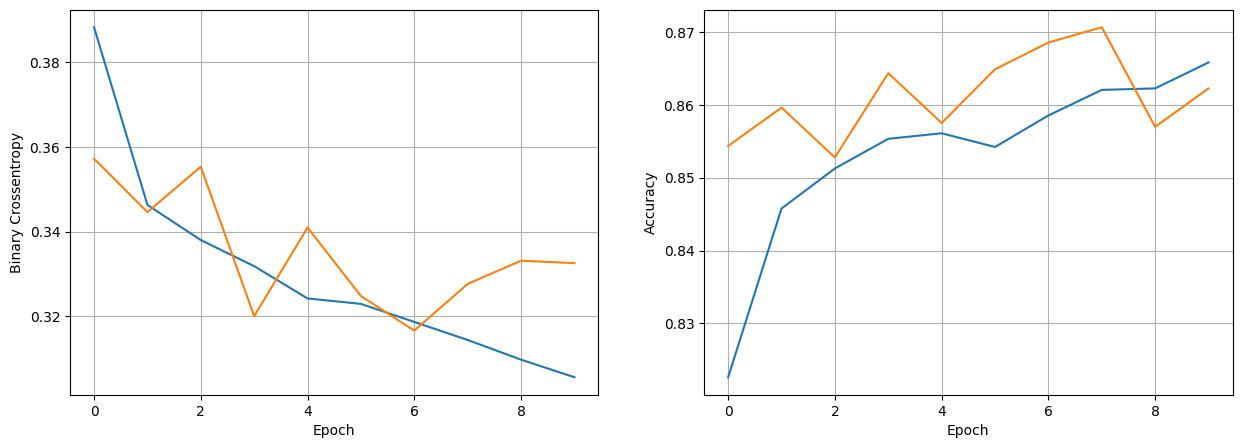

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8721 - loss: 0.3153
64 0 0.01 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7907 - loss: 0.4416 - val_accuracy: 0.8470 - val_loss: 0.3795
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8490 - loss: 0.3463 - val_accuracy: 0.8575 - val_loss: 0.3431
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8470 - loss: 0.3410 - val_accuracy: 0.8507 - val_loss: 0.3533
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8541 - loss: 0.3283 - val_accuracy: 0.8607 - val_loss: 0.3383
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8566 - loss: 0.3197 - val_accuracy: 0.8649 - val_loss: 0.3448
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8591 - loss: 0.3206 - val_accuracy: 0.8649 - val_loss: 0.3176
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8587 - loss: 0.3162 - val_accuracy: 0.8349 - val_loss: 0.3765
Epoch 8/10
154/15

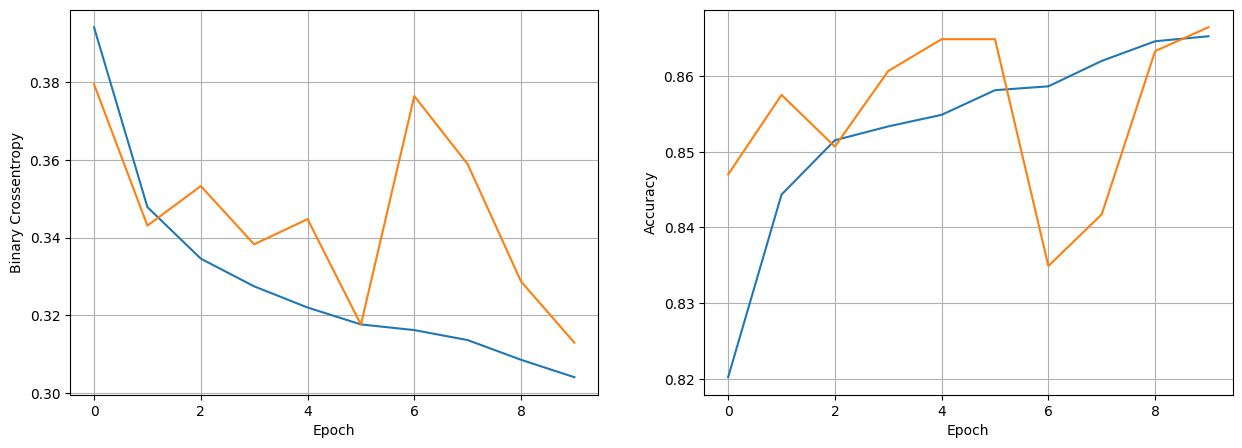

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8792 - loss: 0.2987
64 0 0.005 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8036 - loss: 0.4208 - val_accuracy: 0.8502 - val_loss: 0.3493
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8451 - loss: 0.3412 - val_accuracy: 0.8465 - val_loss: 0.3665
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8492 - loss: 0.3394 - val_accuracy: 0.8670 - val_loss: 0.3238
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8556 - loss: 0.3267 - val_accuracy: 0.8475 - val_loss: 0.3426
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8578 - loss: 0.3206 - val_accuracy: 0.8701 - val_loss: 0.3057
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8529 - loss: 0.3210 - val_accuracy: 0.8659 - val_loss: 0.3192
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8607 - loss: 0.3151 - val_accuracy: 0.8517 - val_loss: 0.3485
Epoch 8/10
614/61

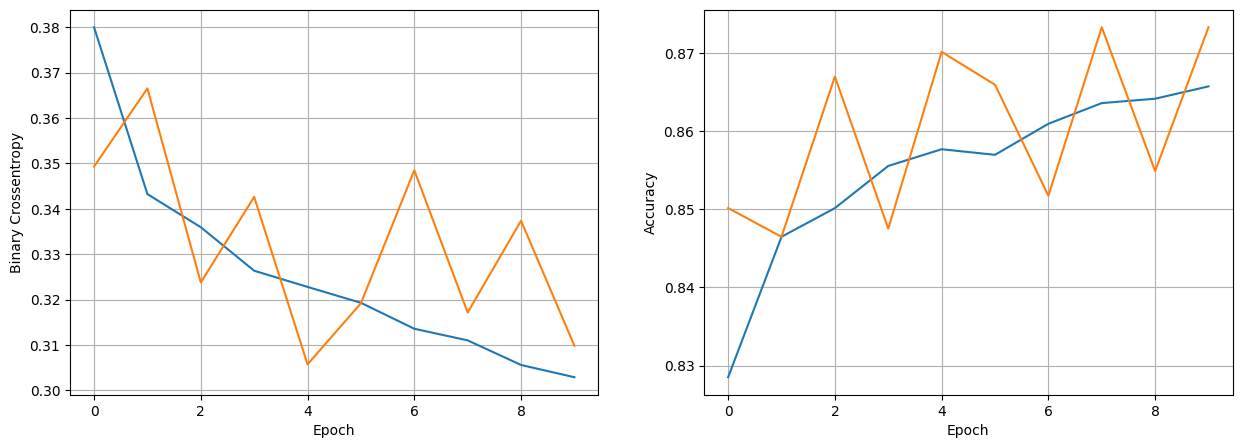

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8875 - loss: 0.2924
64 0 0.005 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7910 - loss: 0.4346 - val_accuracy: 0.8580 - val_loss: 0.3453
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8485 - loss: 0.3499 - val_accuracy: 0.8628 - val_loss: 0.3209
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8487 - loss: 0.3366 - val_accuracy: 0.8423 - val_loss: 0.3498
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8533 - loss: 0.3279 - val_accuracy: 0.8575 - val_loss: 0.3358
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8527 - loss: 0.3251 - val_accuracy: 0.8612 - val_loss: 0.3255
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8614 - loss: 0.3133 - val_accuracy: 0.8617 - val_loss: 0.3243
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8640 - loss: 0.3130 - val_accuracy: 0.8686 - val_loss: 0.3167
Epoch 8/10
307/30

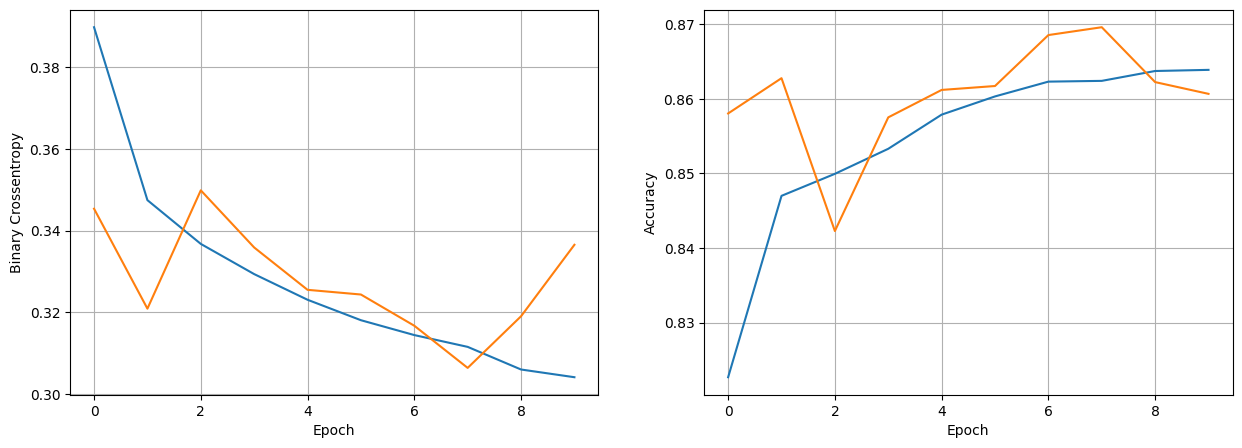

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8727 - loss: 0.3281
64 0 0.005 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7806 - loss: 0.4545 - val_accuracy: 0.8454 - val_loss: 0.3618
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8440 - loss: 0.3539 - val_accuracy: 0.8565 - val_loss: 0.3495
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8526 - loss: 0.3372 - val_accuracy: 0.8617 - val_loss: 0.3392
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8587 - loss: 0.3285 - val_accuracy: 0.8665 - val_loss: 0.3269
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8581 - loss: 0.3231 - val_accuracy: 0.8570 - val_loss: 0.3454
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8601 - loss: 0.3214 - val_accuracy: 0.8675 - val_loss: 0.3139
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8580 - loss: 0.3185 - val_accuracy: 0.8649 - val_loss: 0.3222
Epoch 8/10
154/1

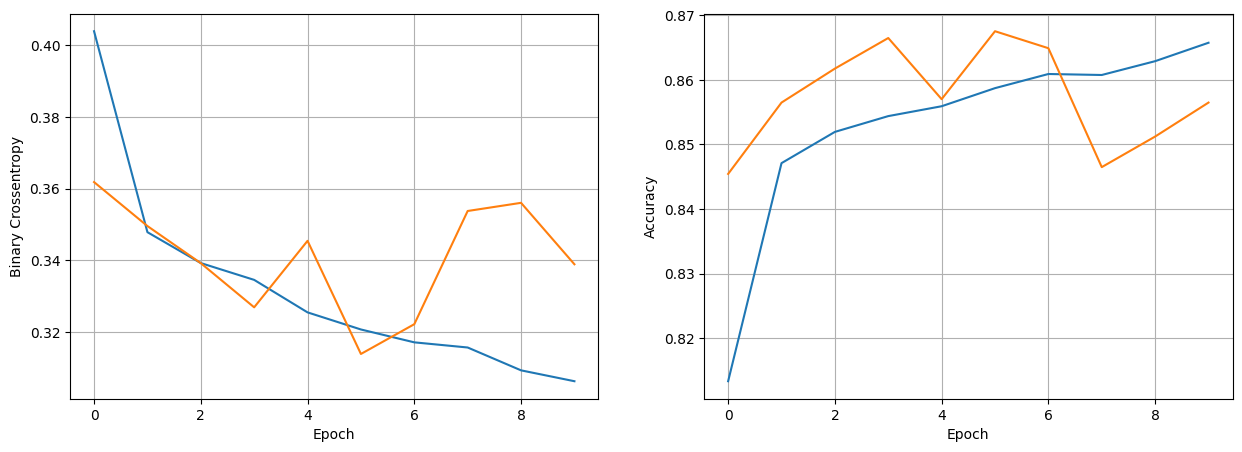

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8631 - loss: 0.3328
64 0 0.001 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7733 - loss: 0.4715 - val_accuracy: 0.8381 - val_loss: 0.3859
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8385 - loss: 0.3606 - val_accuracy: 0.8423 - val_loss: 0.3742
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8447 - loss: 0.3454 - val_accuracy: 0.8470 - val_loss: 0.3644
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8556 - loss: 0.3286 - val_accuracy: 0.8607 - val_loss: 0.3421
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8552 - loss: 0.3294 - val_accuracy: 0.8580 - val_loss: 0.3363
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8638 - loss: 0.3214 - val_accuracy: 0.8644 - val_loss: 0.3229
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8570 - loss: 0.3210 - val_accuracy: 0.8428 - val_loss: 0.3676
Epoch 8/10
614/61

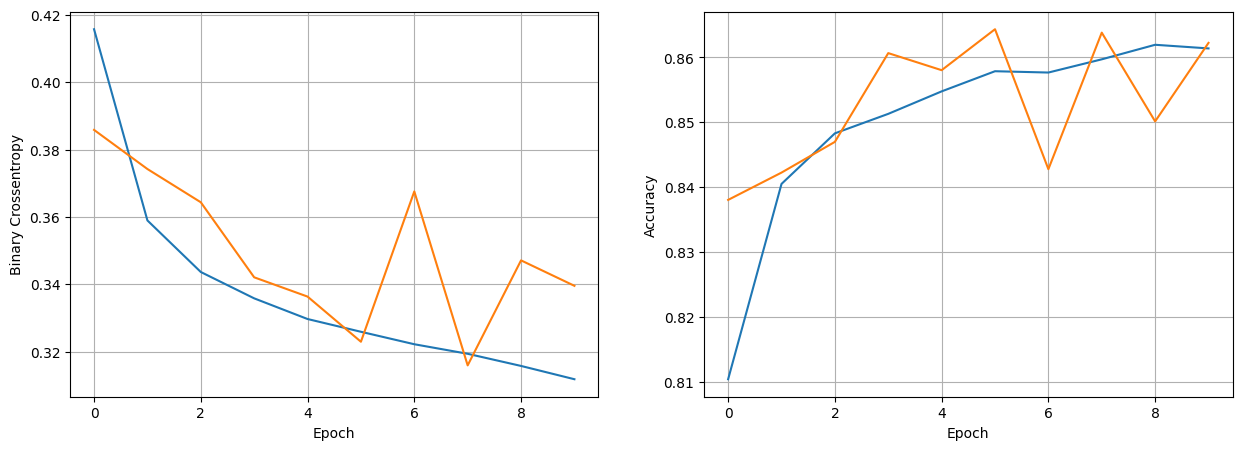

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8651 - loss: 0.3330
64 0 0.001 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7589 - loss: 0.4983 - val_accuracy: 0.8302 - val_loss: 0.4050
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8323 - loss: 0.3797 - val_accuracy: 0.8165 - val_loss: 0.3945
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8380 - loss: 0.3593 - val_accuracy: 0.8507 - val_loss: 0.3560
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8446 - loss: 0.3516 - val_accuracy: 0.8491 - val_loss: 0.3595
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8473 - loss: 0.3354 - val_accuracy: 0.8544 - val_loss: 0.3540
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8510 - loss: 0.3432 - val_accuracy: 0.8554 - val_loss: 0.3498
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8518 - loss: 0.3305 - val_accuracy: 0.8512 - val_loss: 0.3482
Epoch 8/10
307/30

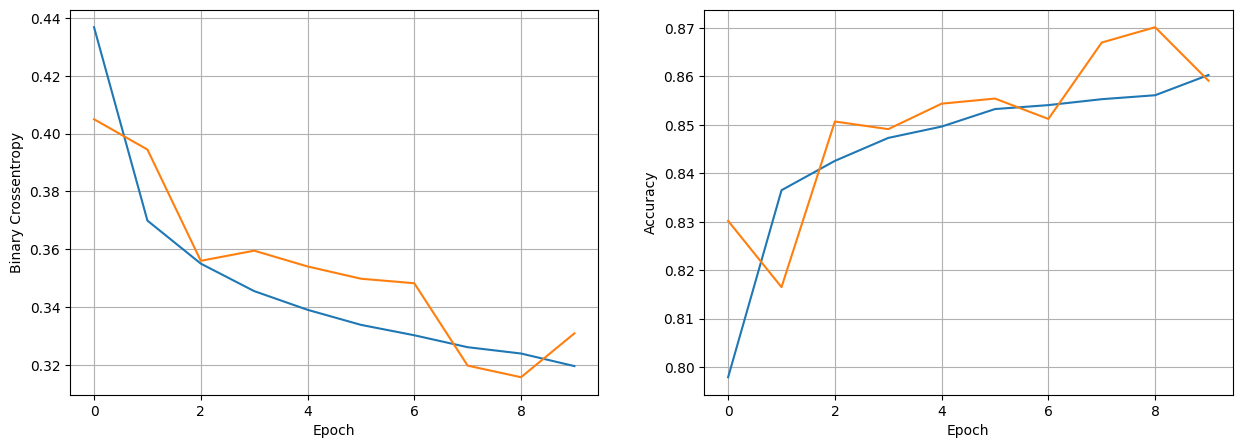

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8735 - loss: 0.3224
64 0 0.001 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7303 - loss: 0.5491 - val_accuracy: 0.8328 - val_loss: 0.4086
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8206 - loss: 0.3950 - val_accuracy: 0.8517 - val_loss: 0.3642
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8369 - loss: 0.3712 - val_accuracy: 0.8302 - val_loss: 0.3903
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8493 - loss: 0.3527 - val_accuracy: 0.8538 - val_loss: 0.3586
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8526 - loss: 0.3390 - val_accuracy: 0.8491 - val_loss: 0.3656
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8475 - loss: 0.3434 - val_accuracy: 0.8549 - val_loss: 0.3472
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8565 - loss: 0.3391 - val_accuracy: 0.8591 - val_loss: 0.3471
Epoch 8/10
154/1

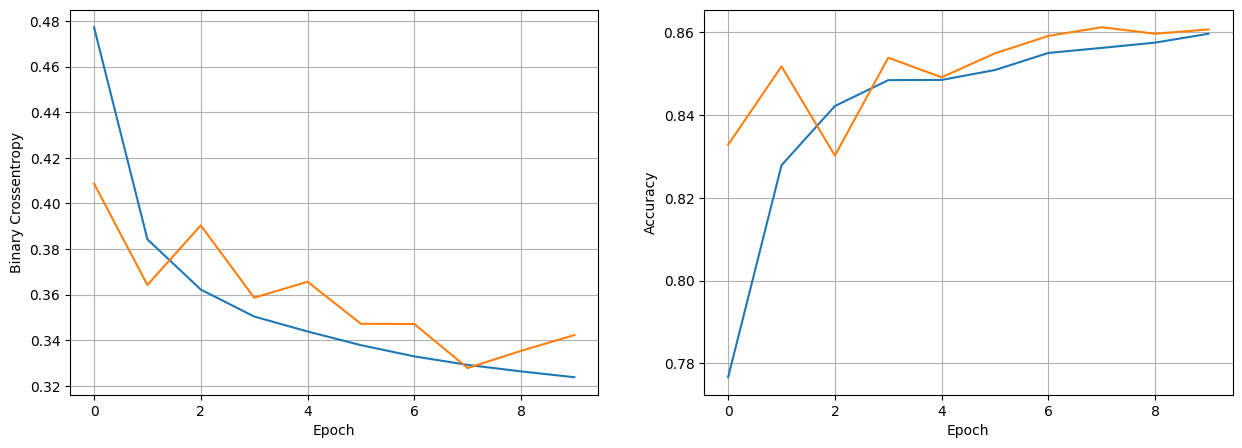

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8691 - loss: 0.3321
64 0.2 0.01 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7892 - loss: 0.4462 - val_accuracy: 0.8507 - val_loss: 0.3416
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8318 - loss: 0.3728 - val_accuracy: 0.8612 - val_loss: 0.3387
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8381 - loss: 0.3602 - val_accuracy: 0.8507 - val_loss: 0.3717
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8431 - loss: 0.3556 - val_accuracy: 0.8323 - val_loss: 0.4100
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8435 - loss: 0.3589 - val_accuracy: 0.8638 - val_loss: 0.3212
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8422 - loss: 0.3535 - val_accuracy: 0.8623 - val_loss: 0.3403
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8443 - loss: 0.3544 - val_accuracy: 0.8507 - val_loss: 0.3566
Epoch 8/10
614/6

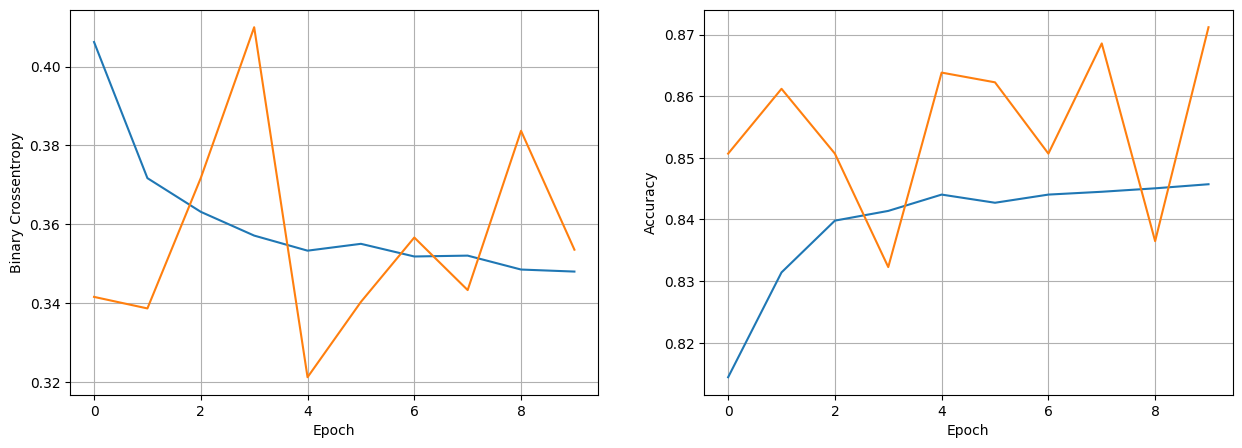

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8825 - loss: 0.3428
64 0.2 0.01 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7850 - loss: 0.4500 - val_accuracy: 0.8475 - val_loss: 0.3723
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8341 - loss: 0.3667 - val_accuracy: 0.8433 - val_loss: 0.3538
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8392 - loss: 0.3620 - val_accuracy: 0.8617 - val_loss: 0.3470
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8386 - loss: 0.3538 - val_accuracy: 0.8502 - val_loss: 0.3438
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8446 - loss: 0.3488 - val_accuracy: 0.8438 - val_loss: 0.3625
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8414 - loss: 0.3533 - val_accuracy: 0.8475 - val_loss: 0.3580
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8491 - loss: 0.3429 - val_accuracy: 0.8596 - val_loss: 0.3560
Epoch 8/10
307/3

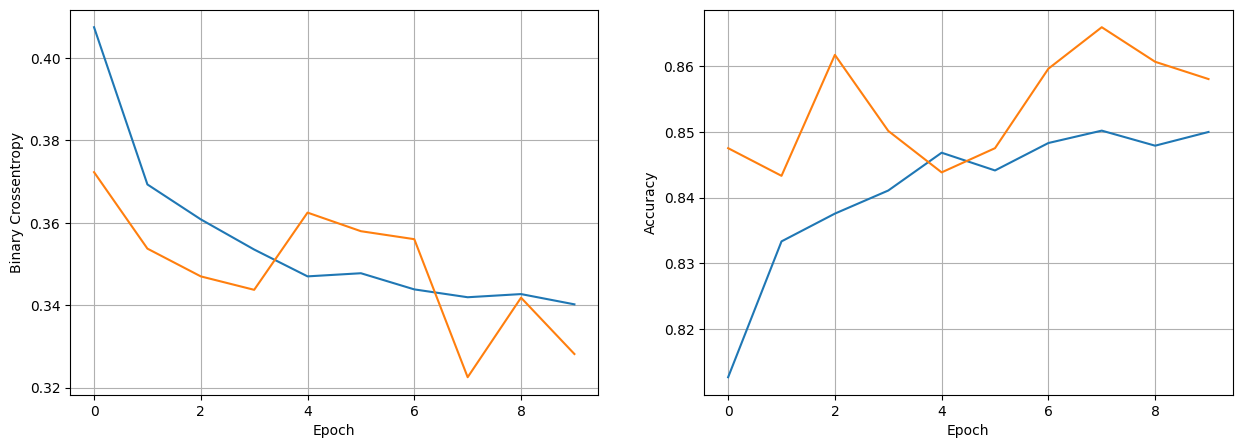

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8679 - loss: 0.3199
64 0.2 0.01 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7560 - loss: 0.4810 - val_accuracy: 0.8502 - val_loss: 0.3609
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8282 - loss: 0.3814 - val_accuracy: 0.8318 - val_loss: 0.3709
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8384 - loss: 0.3647 - val_accuracy: 0.8617 - val_loss: 0.3424
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8438 - loss: 0.3445 - val_accuracy: 0.8633 - val_loss: 0.3446
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8452 - loss: 0.3434 - val_accuracy: 0.8575 - val_loss: 0.3425
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8451 - loss: 0.3392 - val_accuracy: 0.8623 - val_loss: 0.3392
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8480 - loss: 0.3433 - val_accuracy: 0.8701 - val_loss: 0.3339
Epoch 8/10
154/

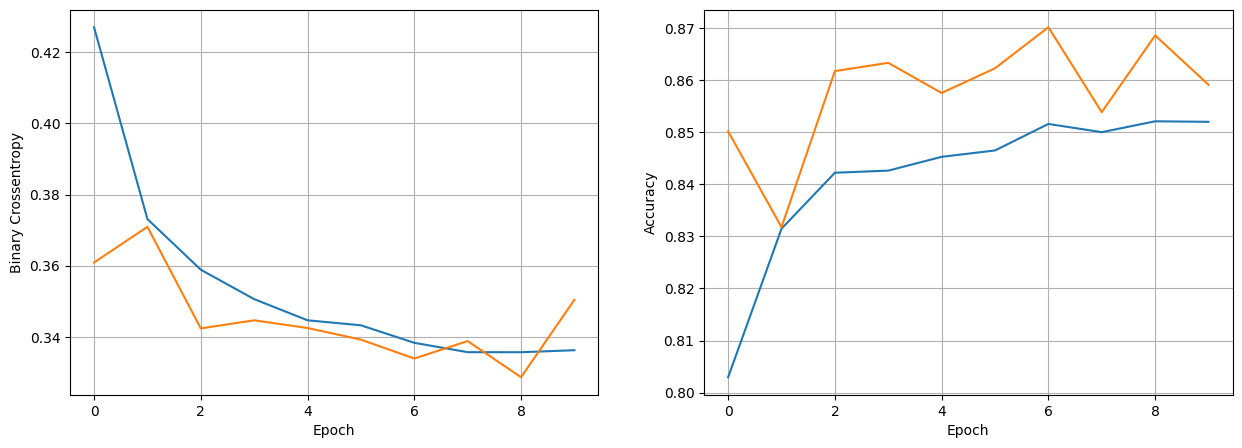

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8676 - loss: 0.3488
64 0.2 0.005 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7848 - loss: 0.4463 - val_accuracy: 0.8612 - val_loss: 0.3553
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8301 - loss: 0.3716 - val_accuracy: 0.8633 - val_loss: 0.3436
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8431 - loss: 0.3525 - val_accuracy: 0.8491 - val_loss: 0.3511
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8441 - loss: 0.3516 - val_accuracy: 0.8649 - val_loss: 0.3310
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8431 - loss: 0.3536 - val_accuracy: 0.8717 - val_loss: 0.3178
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8471 - loss: 0.3424 - val_accuracy: 0.8670 - val_loss: 0.3290
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8458 - loss: 0.3431 - val_accuracy: 0.8686 - val_loss: 0.3243
Epoch 8/10
614/

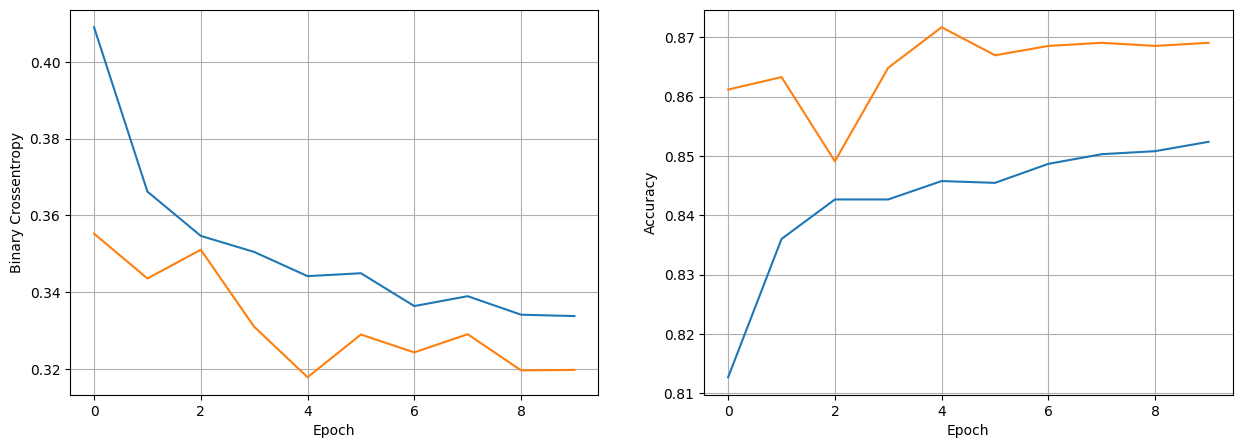

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8819 - loss: 0.3087
64 0.2 0.005 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7764 - loss: 0.4574 - val_accuracy: 0.8612 - val_loss: 0.3464
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8307 - loss: 0.3767 - val_accuracy: 0.8612 - val_loss: 0.3409
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8411 - loss: 0.3543 - val_accuracy: 0.8623 - val_loss: 0.3275
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8398 - loss: 0.3509 - val_accuracy: 0.8628 - val_loss: 0.3425
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8504 - loss: 0.3358 - val_accuracy: 0.8670 - val_loss: 0.3257
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8516 - loss: 0.3390 - val_accuracy: 0.8733 - val_loss: 0.3299
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8527 - loss: 0.3372 - val_accuracy: 0.8701 - val_loss: 0.3215
Epoch 8/10
307/

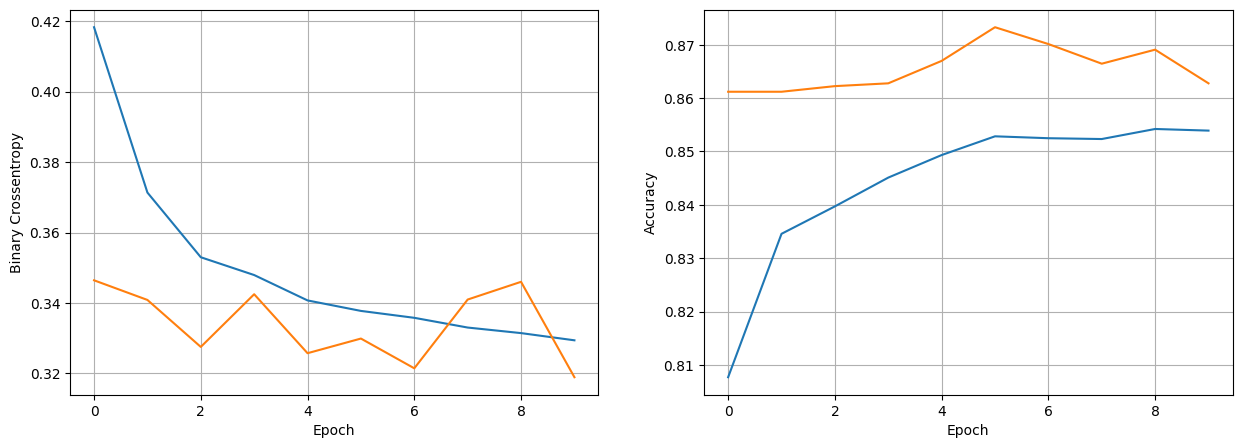

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3117
64 0.2 0.005 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7534 - loss: 0.4919 - val_accuracy: 0.8275 - val_loss: 0.3938
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8354 - loss: 0.3730 - val_accuracy: 0.8538 - val_loss: 0.3552
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8399 - loss: 0.3572 - val_accuracy: 0.8528 - val_loss: 0.3627
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8488 - loss: 0.3421 - val_accuracy: 0.8670 - val_loss: 0.3336
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8450 - loss: 0.3459 - val_accuracy: 0.8644 - val_loss: 0.3379
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8533 - loss: 0.3329 - val_accuracy: 0.8665 - val_loss: 0.3333
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8551 - loss: 0.3310 - val_accuracy: 0.8544 - val_loss: 0.3322
Epoch 8/10
154

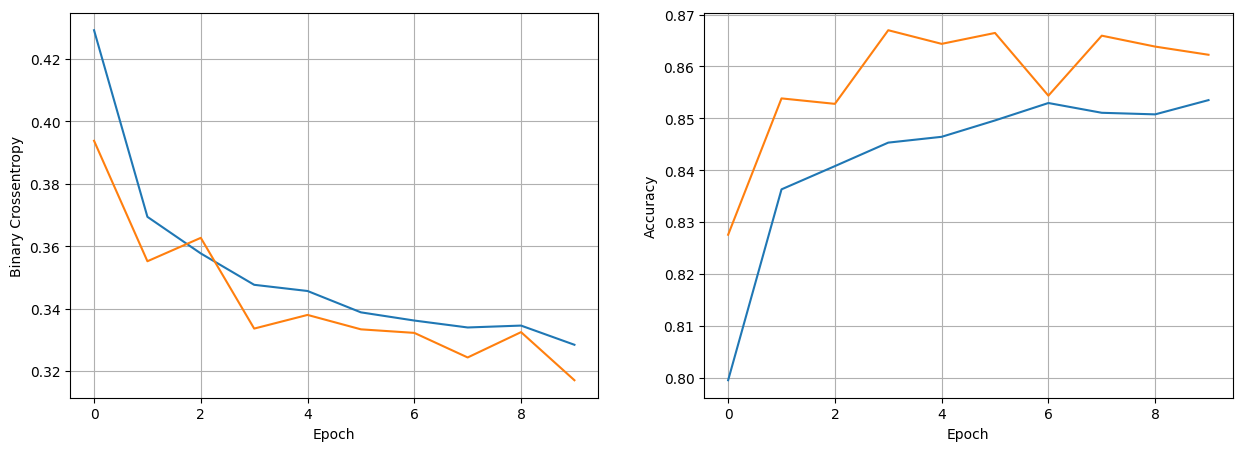

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8679 - loss: 0.3068
64 0.2 0.001 32
Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7573 - loss: 0.4906 - val_accuracy: 0.7981 - val_loss: 0.4183
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8224 - loss: 0.4003 - val_accuracy: 0.8538 - val_loss: 0.3526
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8303 - loss: 0.3763 - val_accuracy: 0.8507 - val_loss: 0.3513
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8412 - loss: 0.3593 - val_accuracy: 0.8549 - val_loss: 0.3455
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8362 - loss: 0.3608 - val_accuracy: 0.8559 - val_loss: 0.3382
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8440 - loss: 0.3499 - val_accuracy: 0.8570 - val_loss: 0.3350
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8461 - loss: 0.3532 - val_accuracy: 0.8607 - val_loss: 0.3370
Epoch 8/10
614/

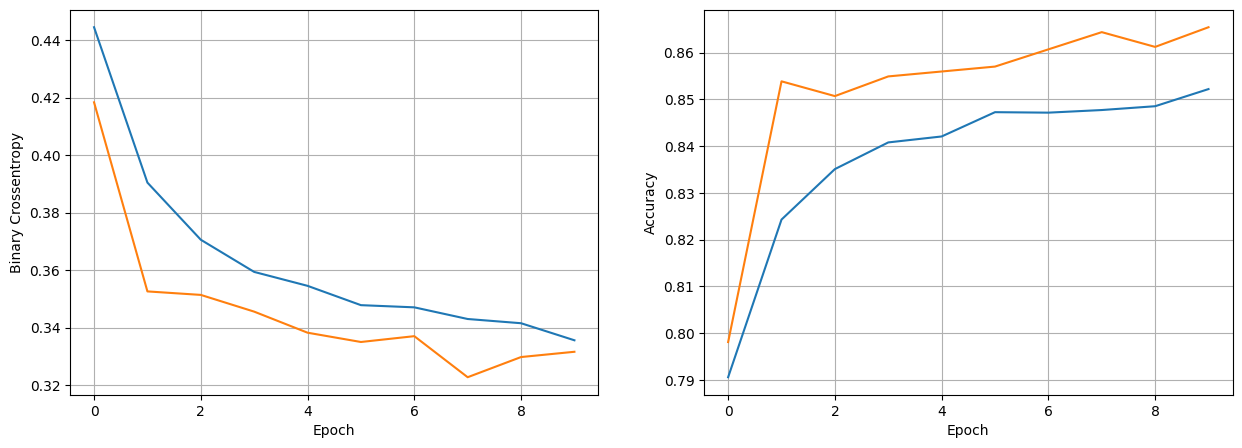

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8695 - loss: 0.3250
64 0.2 0.001 64
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7307 - loss: 0.5290 - val_accuracy: 0.8291 - val_loss: 0.4148
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8142 - loss: 0.4127 - val_accuracy: 0.8365 - val_loss: 0.3909
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8288 - loss: 0.3872 - val_accuracy: 0.8460 - val_loss: 0.3716
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8302 - loss: 0.3760 - val_accuracy: 0.8549 - val_loss: 0.3572
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8362 - loss: 0.3652 - val_accuracy: 0.8565 - val_loss: 0.3445
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8422 - loss: 0.3563 - val_accuracy: 0.8565 - val_loss: 0.3461
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8400 - loss: 0.3614 - val_accuracy: 0.8517 - val_loss: 0.3485
Epoch 8/10
307/

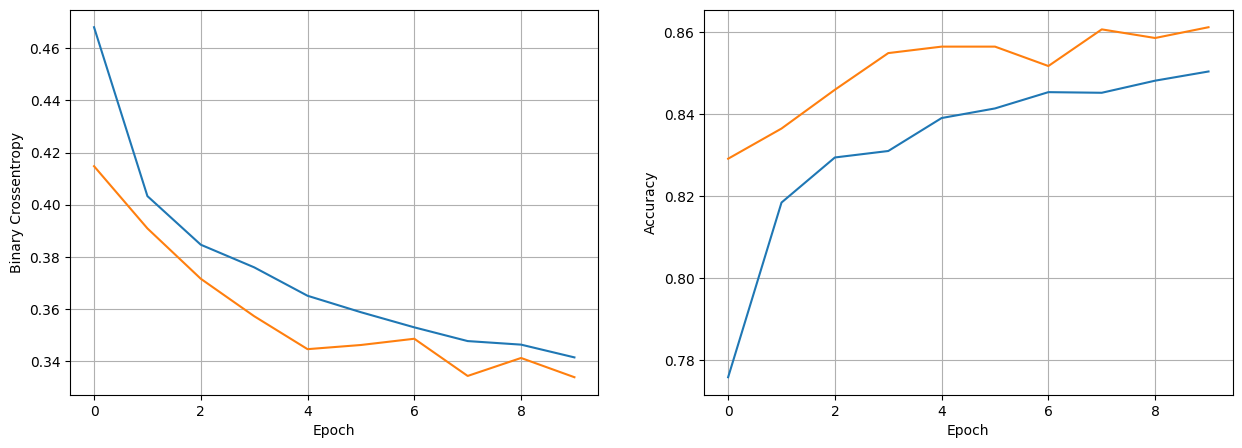

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8674 - loss: 0.3256
64 0.2 0.001 128
Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7159 - loss: 0.5580 - val_accuracy: 0.8228 - val_loss: 0.4179
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7947 - loss: 0.4290 - val_accuracy: 0.8491 - val_loss: 0.3883
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8207 - loss: 0.4003 - val_accuracy: 0.8460 - val_loss: 0.3709
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8291 - loss: 0.3875 - val_accuracy: 0.8528 - val_loss: 0.3657
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8301 - loss: 0.3831 - val_accuracy: 0.8612 - val_loss: 0.3565
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8393 - loss: 0.3603 - val_accuracy: 0.8591 - val_loss: 0.3462
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8399 - loss: 0.3576 - val_accuracy: 0.8502 - val_loss: 0.3572
Epoch 8/10
154

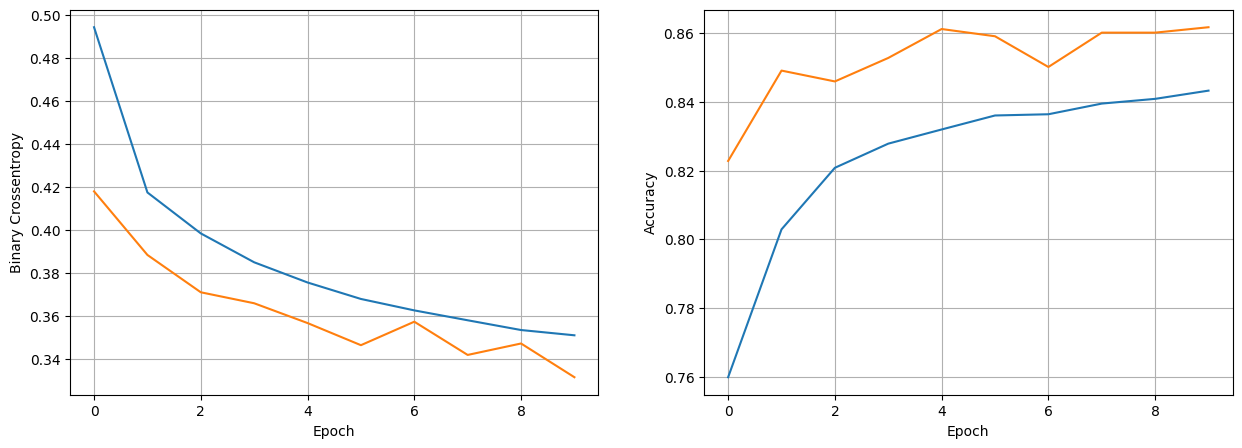

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8702 - loss: 0.3201


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=10
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [ ]:
least_loss_model.predict(x_test)
# y_pred = (y_pred > 0.5).astype(int)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.1276491e-06],
       [6.0230637e-01],
       [3.7724501e-04],
       ...,
       [6.5108705e-01],
       [5.9192061e-01],
       [2.5826579e-01]], dtype=float32)